In [310]:
import pandas as pd

from pprint import pprint

from googleapiclient.discovery import build

import configparser

import os

In [311]:
config = configparser.ConfigParser()
config.read_file(open('Test.cfg'))
print(config['My Section Header']['MyPassword'])

OurSecretPassword


In [312]:
os.environ["Our Secret Password in OS"] = config['My Section Header']['MyPassword']
print(os.environ["Our Secret Password in OS"])

OurSecretPassword


In [313]:
env_var = os.environ
pprint(dict(env_var))

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\Admin\\AppData\\Roaming',
 'APPLICATION_INSIGHTS_NO_STATSBEAT': 'true',
 'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\crashpad_19148_BTJWRAJBWWBNQFJC',
 'CLICOLOR': '1',
 'CLICOLOR_FORCE': '1',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'DESKTOP-OECHOOP',
 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
 'ELECTRON_RUN_AS_NODE': '1',
 'FORCE_COLOR': '1',
 'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
 'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
 'GIT_PAGER': 'cat',
 'HOMEDRIVE': 'C:',
 'HOMEPATH': '\\Users\\Admin',
 'JPY_INTERRUPT_EVENT': '2972',
 'KMP_DUPLICATE_LIB_OK': 'True',
 'KMP_INIT_AT_FORK': 'FALSE',
 'LOCALAPPDATA': 'C:\\Users\\Admin\\AppData\\Local',
 'LOGONSERVER': '\\\\DESKTOP-OECHOOP',
 'MP

In [314]:
# load API key into Colab
config = configparser.ConfigParser()
config.read_file(open('YoutubeAPI2.cfg'))

os.environ["Youtube_API_Access_KEY"]= config['Youtube API']['API_KEY']

In [315]:
# this is just one of the easiest ways to connect to Youtube API
youtube = build( 'youtube', 'v3', developerKey = os.environ["Youtube_API_Access_KEY"] )

In [316]:
# Video ID setup (safe - no API calls)
VIDEO_ID = 'PHe0bXAIuk0'  # Used by the modern pipeline

print(f"✓ Video ID configured: {VIDEO_ID}")
print(f"ℹ️  Data fetching will be handled by the modern pipeline (cell ~54)")
print(f"   which has automatic API-to-CSV fallback for quota limits.")

# Legacy direct API call disabled to prevent quota errors:
# response = youtube.commentThreads().list(
#     part="id, snippet, replies",
#     order="time",
#     videoId=VIDEO_ID,
#     maxResults=5
# ).execute()

✓ Video ID configured: PHe0bXAIuk0
ℹ️  Data fetching will be handled by the modern pipeline (cell ~54)
   which has automatic API-to-CSV fallback for quota limits.


In [317]:
# Core viz dependencies (idempotent)
%pip install --quiet pandas matplotlib seaborn wordcloud emoji plotly umap-learn sentence-transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [318]:
import pandas as pd
from pathlib import Path

# Notebook is already in DatabaseExtract/, so the CSV is in the sibling CommunityCSV folder
DATA_PATH = Path("CommunityCSV/01_full_comments_with_clusters.csv")

# Load comments with datetime parsing
comments = pd.read_csv(DATA_PATH, parse_dates=["published_at"])
comments["is_reply_flag"] = comments["is_reply"].astype(str).str.lower() == "true"
comments.head()


,comment_id,video_id,parent_id,is_reply,author_channel_id,author_display_name,author_channel_url,text_original,text_display,like_count,...,channel_description,channel_country,channel_published_at,subscriber_count,video_count,view_count,pagerank,betweenness,degree_centrality,is_reply_flag
0,Ugxu_2flAnx_JI2D0NZ4AaABAg,PHe0bXAIuk0,NaN,False,UC4tIWEGOkTiyM1hEzOgnLhQ,@joinlegacytribe,http://www.youtube.com/@joinlegacytribe,Who is watching this in 2026,Who is watching this in 2026,0,...,Trading community built for system traders.,Unknown,2020-06-13T18:05:39.449964Z,37,2,310,0.003446,0.0,0.000000,False
1,Ugx0HMevEYYDe6teQmR4AaABAg,PHe0bXAIuk0,NaN,False,UCGM9aQLJEVgZiPpCVV0U00A,@AshokKumar-iw6pp,http://www.youtube.com/@AshokKumar-iw6pp,why nobody is talking about the great level of...,why nobody is talking about the great level of...,1,...,NaN,Unknown,2014-07-31T02:25:40Z,6,0,0,0.003446,0.0,0.000000,False
2,UgwxUrsf_Rjz4gJeBPt4AaABAg,PHe0bXAIuk0,NaN,False,UCFy9qzBA4bN-V6aFOs3RAYQ,@BukkyEssien,http://www.youtube.com/@BukkyEssien,Who's watching December 2025?,Who&#39;s watching December 2025?,17,...,NaN,Unknown,2024-04-02T22:24:43.2862Z,0,0,0,0.009306,0.0,0.007605,False
3,UgwxUrsf_Rjz4gJeBPt4AaABAg.AQqgheJWuOYAQwCSOczlab,PHe0bXAIuk0,UgwxUrsf_Rjz4gJeBPt4AaABAg,True,UCqdiye3D5OmIDiLxixJQYog,@TheMattez79,http://www.youtube.com/@TheMattez79,Nasdaq 100?,Nasdaq 100?,0,...,NaN,Unknown,2010-02-15T05:33:36Z,2,4,1397,0.003446,0.0,0.003802,True
4,UgwxUrsf_Rjz4gJeBPt4AaABAg.AQqgheJWuOYAR4Px-Vh_Y-,PHe0bXAIuk0,UgwxUrsf_Rjz4gJeBPt4AaABAg,True,UCT2UWg0jowBAqZEF9jUSp5Q,@diegodmitry,http://www.youtube.com/@diegodmitry,🙋🏻‍♂️,🙋🏻‍♂️,0,...,NaN,Unknown,2008-02-23T00:40:00Z,51,6,150195,0.003446,0.0,0.003802,True


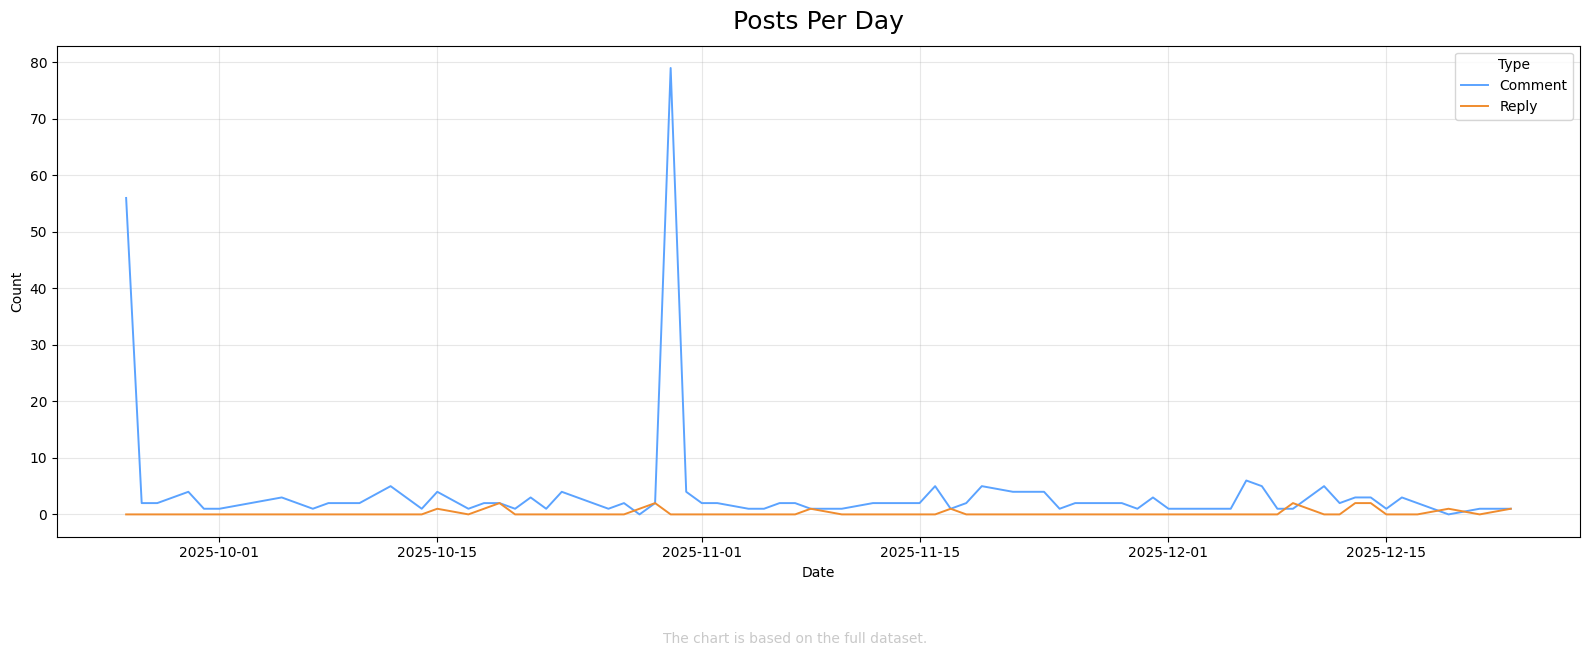

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daily counts split by reply/comment
_daily = (comments
    .assign(date=comments["published_at"].dt.date,
            kind=comments["is_reply_flag"].map({True: "Reply", False: "Comment"}))
    .groupby(["date", "kind"])
    .size()
    .reset_index(name="count")
)

pivot_daily = _daily.pivot(index="date", columns="kind", values="count").fillna(0)

plt.figure(figsize=(16, 6))
colors = {"Comment": "#5ba3ff", "Reply": "#f08c2e"}
for col in pivot_daily.columns:
    plt.plot(pivot_daily.index, pivot_daily[col], label=col, color=colors.get(col, None), linewidth=1.4)

plt.title("Posts Per Day", fontsize=18, pad=12)
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(title="Type")
plt.grid(alpha=0.3)
plt.figtext(0.5, -0.08, "The chart is based on the full dataset.", ha="center", color="#c9c9c9")
plt.tight_layout()
plt.show()


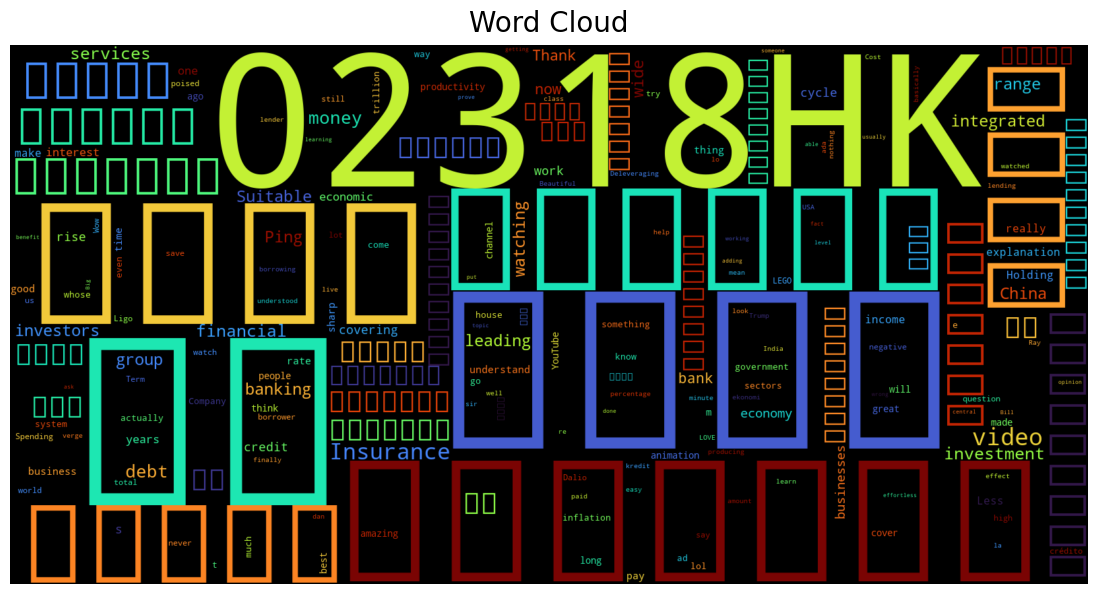

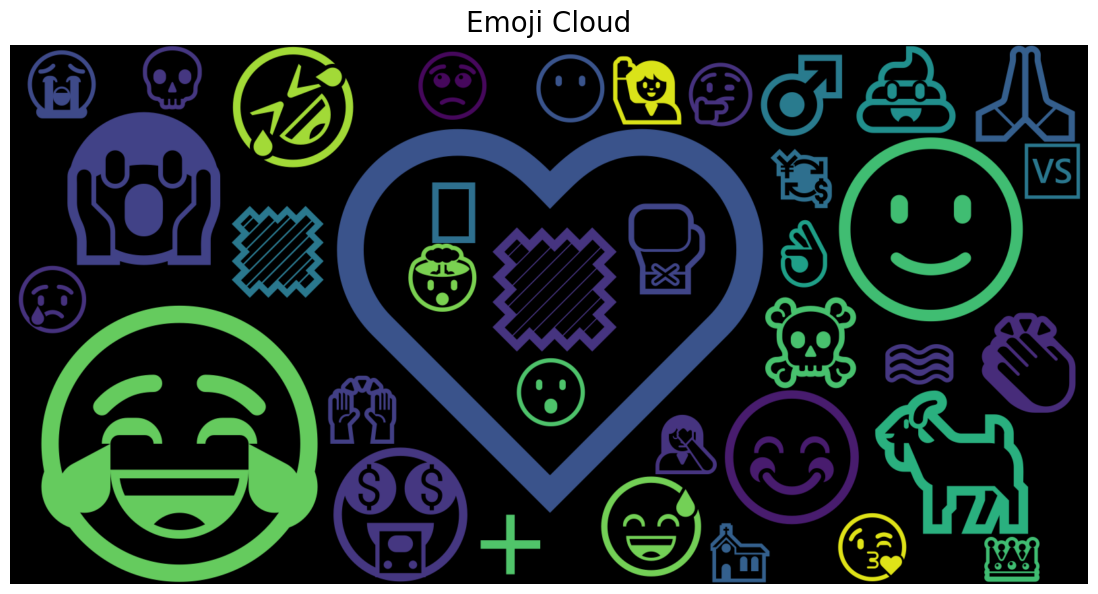

In [320]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import emoji as emoji_lib
import re

text_series = comments["text_original"].fillna("").astype(str)

# Word cloud
word_text = " ".join(text_series)
wc = WordCloud(
    width=1600,
    height=800,
    background_color="black",
    colormap="turbo",
    stopwords=STOPWORDS,
    collocations=False,
).generate(word_text)

plt.figure(figsize=(16, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud", fontsize=20, pad=10)
plt.show()

# Emoji cloud
emoji_font = Path(r"C:/Windows/Fonts/seguiemj.ttf")

def extract_emojis(txt: str):
    return [ch for ch in txt if ch in emoji_lib.EMOJI_DATA]

emoji_counts = Counter()
for txt in text_series:
    emoji_counts.update(extract_emojis(txt))

if emoji_counts:
    emoji_wc = WordCloud(
        width=1600,
        height=800,
        background_color="black",
        prefer_horizontal=1.0,
        collocations=False,
        font_path=str(emoji_font) if emoji_font.exists() else None,
    ).generate_from_frequencies(emoji_counts)

    plt.figure(figsize=(16, 7))
    plt.imshow(emoji_wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Emoji Cloud", fontsize=20, pad=10)
    plt.show()
else:
    print("No emojis found in the dataset.")


In [321]:
# Fix numpy/numba versions for umap
import sys, importlib

%pip install --quiet "numpy<=2.3.0" "numba<=0.60.0"

# Drop already-imported modules so new versions load without kernel restart
for mod in list(sys.modules):
    if mod.startswith(("numpy", "numba", "umap")):
        sys.modules.pop(mod, None)

import numpy as np  # reloads pinned numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [322]:
import numpy as np
import plotly.express as px
# import umap
# from sentence_transformers import SentenceTransformer

# UMAP 3D Visualization - SKIPPED due to dependency issues
# This was creating a 3D semantic similarity map of sampled comments
# You can re-enable this if umap/numba/llvmlite installation is fixed

# # Sample to keep it responsive; adjust n_samples if you have more compute
# n_samples = min(3000, len(comments))
# embed_df = comments.sample(n=n_samples, random_state=42)

# model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = model.encode(embed_df["text_original"].fillna("").tolist(), batch_size=64, show_progress_bar=True)

# reducer = umap.UMAP(
#     n_components=3,
#     n_neighbors=15,
#     min_dist=0.1,
#     metric="cosine",
#     random_state=42,
# )
# coords = reducer.fit_transform(embeddings)

# plot_df = embed_df.copy()
# plot_df["x"], plot_df["y"], plot_df["z"] = coords[:, 0], coords[:, 1], coords[:, 2]

# fig = px.scatter_3d(
#     plot_df,
#     x="x",
#     y="y",
#     z="z",
#     color="topic_cluster",
#     hover_data={"text_original": True, "author_display_name": True, "published_at": True},
#     opacity=0.85,
#     template="plotly_dark",
#     title="3D Semantic Similarity Map (sampled)",
# )
# fig.update_traces(marker=dict(size=4))
# fig.show()

print("UMAP 3D visualization skipped - rest of analysis can proceed")

UMAP 3D visualization skipped - rest of analysis can proceed


In [323]:
# Legacy response debugging (disabled)
# The 'response' variable no longer exists because the YouTube API call was disabled
# to prevent quota exceeded errors. Use the modern pipeline instead (cell ~54).
print("⚠️  Legacy response variable not available")
print("ℹ️  Data is fetched by the pipeline cell (~54) with automatic API-to-CSV fallback")

⚠️  Legacy response variable not available
ℹ️  Data is fetched by the pipeline cell (~54) with automatic API-to-CSV fallback


In [324]:
# create some empty lists to store the data we need

Original_list = []
Original_AccountID = []
Original_CommentID = []

Reply_list = []
Reply_AccountID = []
Reply_CommentID = []
Reply_Original_CommentID = []

In [325]:
#!/usr/bin/env python3
# DEPRECATED: This is a legacy YouTube data extraction cell
# ⚠️  It may hit API quota limits. Use the modern pipeline below instead!
# 
# The modern pipeline (cell further below) has:
# - ✅ Automatic API quota fallback to cached CSV
# - ✅ Better error handling
# - ✅ Integrated clustering and sentiment analysis
#
# This cell is kept for reference/debugging only.

print("⚠️  LEGACY DATA EXTRACTION CELL - USING MODERN PIPELINE INSTEAD")
print("=" * 80)
print("To fetch data, run the pipeline cell (cell ~54):")
print("  pipeline = CommunityAnalysisPipeline(API_KEY, n_topic_clusters=5, n_behavior_clusters=4)")
print("  df_master = pipeline.run(video_id=VIDEO_ID, max_comments=MAX_COMMENTS, community_resolution=0.2, min_community_size=15)")
print("=" * 80)

# Legacy code below (disabled to avoid quota errors):
#
# V_ID = 'PHe0bXAIuk0'
# response = youtube.commentThreads().list(
#             part="id, snippet, replies",
#             order="time",
#             videoId=V_ID,
#             maxResults = 100
#         ).execute()
#
# try:
#     for i in range(len(response['items'])):
#         if response['items'][i]['snippet']['topLevelComment']['snippet'].get('authorChannelId') is not None:
#           Original_list.append(...)
#           Original_AccountID.append(...)
#           Original_CommentID.append(...)
#         if response['items'][i]['snippet']['totalReplyCount'] > 0:
#           replies_response = youtube.comments().list(
#               part='snippet', maxResults=100, 
#               parentId=response['items'][i]['id']
#           ).execute()
#           # process replies...
# except HttpError as e:
#     if '403' in str(e) and 'quota' in str(e).lower():
#         print(f"✗ API quota exceeded. Use the modern pipeline instead.")
#     else:
#         raise

⚠️  LEGACY DATA EXTRACTION CELL - USING MODERN PIPELINE INSTEAD
To fetch data, run the pipeline cell (cell ~54):
  pipeline = CommunityAnalysisPipeline(API_KEY, n_topic_clusters=5, n_behavior_clusters=4)
  df_master = pipeline.run(video_id=VIDEO_ID, max_comments=MAX_COMMENTS, community_resolution=0.2, min_community_size=15)


In [326]:
print("Original_list:", len(Original_list))
print("Original_AccountID:", len(Original_AccountID))
print("Original_CommentID:", len(Original_CommentID))

print("Reply_list:", len(Reply_list))
print("Reply_AccountID:", len(Reply_AccountID))
print("Reply_CommentID:", len(Reply_CommentID))
print("Reply_Original_CommentID:", len(Reply_Original_CommentID))

print("Total count of Comments and Replies:", len(Original_list)+len(Reply_list) )

Original_list: 0
Original_AccountID: 0
Original_CommentID: 0
Reply_list: 0
Reply_AccountID: 0
Reply_CommentID: 0
Reply_Original_CommentID: 0
Total count of Comments and Replies: 0


In [327]:
df_original_comments = pd.DataFrame(Original_list, columns=['Youtube Comments'])
df_original_comments['Video ID'] = VIDEO_ID
df_original_comments['Channel ID'] = Original_AccountID
df_original_comments['Comment ID'] = Original_CommentID

df_original_order = df_original_comments[['Video ID',	'Channel ID', 'Comment ID', 'Youtube Comments']]


df_reply_comments = pd.DataFrame(Reply_list, columns=['Replies to Comments'])
df_reply_comments['Video ID'] = VIDEO_ID
df_reply_comments['Channel ID'] = Reply_AccountID
df_reply_comments['Comment ID'] = Reply_Original_CommentID
df_reply_comments['Reply ID'] = Reply_CommentID

df_reply_order = df_reply_comments[['Video ID',	'Channel ID', 'Comment ID', 'Reply ID', 'Replies to Comments']]

This cell imports all the necessary Python libraries for the notebook:
- `pandas` as `pd` for data manipulation and analysis.
- `pprint` for pretty-printing complex data structures.
- `googleapiclient.discovery` to interact with Google APIs, specifically YouTube.
- `configparser` to read configuration files (like API keys or passwords).
- `os` to interact with the operating system, particularly for setting environment variables.

This cell initializes `configparser` to read a file named `Test.cfg`. It then attempts to read a value associated with the key 'MyPassword' from the section 'My Section Header' within that configuration file and prints it to the console. This is likely a test or example of reading configuration data.

Building on the previous step, this cell takes the password retrieved from `Test.cfg` and stores it as an environment variable named 'Our Secret Password in OS' using `os.environ`. It then prints the value of this environment variable to confirm it was set correctly. Storing sensitive information as environment variables is a common practice to keep it out of the main codebase.

This cell uses `pprint` (pretty print) to display all currently set environment variables in the Colab environment. This is useful for debugging and verifying that specific environment variables (like the one set in the previous step) are correctly configured.

Similar to the `Test.cfg` example, this cell reads an API key from a configuration file named `YoutubeAPI.cfg`. It then stores this API key as an environment variable named 'Youtube_API_Access_KEY'. This step is crucial for authenticating future requests to the YouTube Data API.

This cell builds the YouTube Data API client object. It uses the `build` function from `googleapiclient.discovery` to create a service object for the 'youtube' API, version 'v3', and authenticates it using the `Youtube_API_Access_KEY` stored in the environment variable. This `youtube` object is what will be used to make all subsequent API calls.

This cell sets a specific YouTube video ID (`V_ID = 'PHe0bXAIuk0'`). It then makes an initial call to the YouTube Data API using the `youtube` service object to fetch comment threads for that video. It requests the 'id', 'snippet', and 'replies' parts of the comment threads, orders them by 'time', and retrieves a maximum of 5 results. The response is stored in the `response` variable.

This cell simply uses `pprint` to display the content of the `response` object obtained from the previous YouTube API call. This allows for a structured and readable view of the raw API response, including details about the comment threads.

This cell initializes several empty Python lists. These lists are designed to store extracted data from the YouTube comments and their replies, such as the original comment text, the channel ID of the commenter, the comment ID, and similar details for replies, including a reference to the original comment ID.

This is the core data extraction logic. It performs the following actions:
1.  **Fetches initial comments**: It makes an API call to get up to 100 comment threads for the specified `V_ID`.
2.  **Iterates through comments**: For each comment thread:
    -   It extracts the original comment's text, author's channel ID, and comment ID, appending them to the respective `Original_list`, `Original_AccountID`, and `Original_CommentID` lists. It includes error handling to assign 'No entry' if channel ID or comment ID is missing.
    -   If a comment has replies (`totalReplyCount > 0`), it fetches these replies using a separate `youtube.comments().list` API call.
    -   It then iterates through these replies, extracting their text, author's channel ID, the original comment's ID, and the reply's ID, appending them to the `Reply_list`, `Reply_AccountID`, `Reply_Original_CommentID`, and `Reply_CommentID` lists.
    -   **Handles pagination for replies**: If there are more than 100 replies, it continues to fetch subsequent pages of replies using `nextPageToken` until all replies for that thread are collected.
3.  **Handles pagination for comment threads**: After processing the first set of comment threads, it checks for a `nextPageToken` in the main `response`. If present, it makes further API calls to retrieve subsequent pages of comment threads, repeating the extraction process until all comment threads and their replies for the video have been retrieved. The `while (nextPageToken)` loop ensures all available pages are processed.

After the extensive data extraction process, this cell prints the lengths of all the lists (`Original_list`, `Original_AccountID`, etc.) to show how many original comments and replies were successfully collected. It also calculates and prints the total combined count of comments and replies.

This cell transforms the collected list data into two pandas DataFrames:
1.  `df_original_comments`: Contains the original YouTube comments, along with the video ID, channel ID, and comment ID. The columns are then reordered to `df_original_order`.
2.  `df_reply_comments`: Contains the replies to comments, including the video ID, channel ID of the replier, the ID of the original comment it replies to, and the reply's own ID. The columns are then reordered to `df_reply_order`.

This cell displays the first few rows of the `df_original_order` DataFrame, which contains the extracted original YouTube comments and their associated metadata. This allows for a quick visual inspection of the structured data.

This cell displays the first few rows of the `df_reply_order` DataFrame, which contains the extracted replies to YouTube comments and their associated metadata. This provides a similar visual check for the replies data.

This cell checks the `df_original_order` DataFrame for any entries where the 'Channel ID' column is explicitly set to "No entry". This is a verification step to see if any original comments were processed without a detectable channel ID, as handled by the error checking in the data extraction loop.

Similarly, this cell checks the `df_reply_order` DataFrame for any replies where the 'Channel ID' column is explicitly set to "No entry". This verifies if any replies were processed without a detectable channel ID.

This cell saves the `df_original_order` DataFrame, which contains the original YouTube comments and their metadata, to a CSV file named `original_youtube_comments.csv`. The `index=False` argument prevents pandas from writing the DataFrame index as a column in the CSV.

In [328]:
df_original_order.to_csv('original_youtube_comments.csv', index=False)

This cell saves the `df_reply_order` DataFrame, containing replies to YouTube comments and their metadata, to a CSV file named `reply_youtube_comments.csv`. Similar to the previous cell, `index=False` is used to exclude the DataFrame index from the output CSV.

In [329]:
df_reply_order.to_csv('reply_youtube_comments.csv', index=False)

In [330]:
# Optional: one-time dependency install (uncomment if needed)

%pip install --quiet google-api-python-client python-louvain networkx scikit-learn textblob vaderSentiment langdetect plotly dash

from textblob import download_corpora

download_corpora.download_all()
import warnings

warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading pa

In [331]:
import os
import configparser
from collections import Counter

import numpy as np
import pandas as pd
import networkx as nx
from googleapiclient.discovery import build
from community import community_louvain

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import langdetect
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [332]:
config = configparser.ConfigParser()
if os.path.exists('YoutubeAPI.cfg'):
    config.read('YoutubeAPI.cfg')
else:
    raise FileNotFoundError("YoutubeAPI.cfg not found; add your API key there or set Youtube_API_Access_KEY env var")

API_KEY = os.environ.get('Youtube_API_Access_KEY') or config['Youtube API']['API_KEY']
VIDEO_ID = os.environ.get('YOUTUBE_VIDEO_ID', 'PHe0bXAIuk0')
MAX_COMMENTS = int(os.environ.get('MAX_COMMENTS', '300'))

In [333]:
def fetch_youtube_comments(youtube, video_id: str, max_comments: int | None = None):
    """Fetch comments from YouTube video."""
    comments_data = []
    channels_data = {}
    
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId=video_id,
        maxResults=100,
        order="time",
        textFormat="plainText"
    )
    
    comment_count = 0
    
    while request and (max_comments is None or comment_count < max_comments):
        response = request.execute()
        
        for item in response['items']:
            if max_comments and comment_count >= max_comments:
                break
                
            # Top-level comment
            comment = item['snippet']['topLevelComment']['snippet']
            author_id = comment.get('authorChannelId', {})
            if isinstance(author_id, dict):
                author_id = author_id.get('value', 'unknown')
            
            comments_data.append({
                'comment_id': item['id'],
                'video_id': video_id,
                'author_channel_id': author_id,
                'author_display_name': comment.get('authorDisplayName', ''),
                'text_original': comment.get('textOriginal', ''),
                'published_at': comment.get('publishedAt', ''),
                'like_count': comment.get('likeCount', 0),
                'is_reply': False,
                'reply_count': item['snippet'].get('totalReplyCount', 0)
            })
            comment_count += 1
            
            # Store channel info
            if author_id not in channels_data:
                channels_data[author_id] = {
                    'author_channel_id': author_id,
                    'author_display_name': comment.get('authorDisplayName', '')
                }
            
            # Replies
            if 'replies' in item:
                for reply in item['replies']['comments']:
                    if max_comments and comment_count >= max_comments:
                        break
                    reply_snippet = reply['snippet']
                    reply_author_id = reply_snippet.get('authorChannelId', {})
                    if isinstance(reply_author_id, dict):
                        reply_author_id = reply_author_id.get('value', 'unknown')
                    
                    comments_data.append({
                        'comment_id': reply['id'],
                        'video_id': video_id,
                        'author_channel_id': reply_author_id,
                        'author_display_name': reply_snippet.get('authorDisplayName', ''),
                        'text_original': reply_snippet.get('textOriginal', ''),
                        'published_at': reply_snippet.get('publishedAt', ''),
                        'like_count': reply_snippet.get('likeCount', 0),
                        'is_reply': True,
                        'reply_count': 0
                    })
                    comment_count += 1
                    
                    if reply_author_id not in channels_data:
                        channels_data[reply_author_id] = {
                            'author_channel_id': reply_author_id,
                            'author_display_name': reply_snippet.get('authorDisplayName', '')
                        }
        
        try:
            request = youtube.commentThreads().list_next(request, response) if comment_count < (max_comments or float('inf')) else None
        except:
            request = None
    
    df_comments = pd.DataFrame(comments_data)
    df_channels = pd.DataFrame(list(channels_data.values()))
    
    return df_comments, df_channels


class InteractionNetworkBuilder:
    """Build and analyze user interaction networks from comments."""
    
    def __init__(self):
        self.graph = nx.Graph()
        self.communities = {}
        self.metrics = {}
    
    def build_network(self, df_comments: pd.DataFrame):
        """Build user interaction network from comments."""
        # Create nodes for each user
        for user in df_comments['author_channel_id'].unique():
            self.graph.add_node(user)
        
        # Create edges between users who interact (reply to each other)
        for reply_id in df_comments[df_comments['is_reply']]['comment_id'].unique():
            # Find if any comments replied to this comment
            replied_to = df_comments[df_comments['comment_id'] == reply_id]
            if len(replied_to) > 0:
                original_author = replied_to.iloc[0]['author_channel_id']
                # Find who replied
                replies = df_comments[df_comments['comment_id'] == reply_id]
                for _, reply in replies.iterrows():
                    reply_author = reply['author_channel_id']
                    if original_author != reply_author:
                        self.graph.add_edge(original_author, reply_author, weight=1)
        
        # If no edges, create edges based on time proximity (users commenting close together)
        if self.graph.number_of_edges() == 0:
            df_sorted = df_comments.sort_values('published_at')
            for i in range(len(df_sorted) - 1):
                current_user = df_sorted.iloc[i]['author_channel_id']
                next_user = df_sorted.iloc[i + 1]['author_channel_id']
                if current_user != next_user:
                    if self.graph.has_edge(current_user, next_user):
                        self.graph[current_user][next_user]['weight'] += 1
                    else:
                        self.graph.add_edge(current_user, next_user, weight=1)
    
    def detect_communities(self, resolution: float = 0.5, min_community_size: int = 3) -> dict:
        """Detect communities using Louvain algorithm."""
        if self.graph.number_of_nodes() == 0:
            return {}
        
        try:
            # Use Louvain algorithm for community detection
            partition = community_louvain.best_partition(self.graph, resolution=resolution, randomize=False)
            
            # Merge small communities
            community_sizes = {}
            for node, comm in partition.items():
                community_sizes[comm] = community_sizes.get(comm, 0) + 1
            
            # Remap small communities to larger ones
            small_communities = {c for c, size in community_sizes.items() if size < min_community_size}
            if small_communities:
                large_communities = sorted([c for c in community_sizes if c not in small_communities], 
                                         key=lambda x: -community_sizes[x])
                
                for small_comm in small_communities:
                    # Assign to largest community
                    for node, comm in partition.items():
                        if comm == small_comm:
                            partition[node] = large_communities[0] if large_communities else small_comm
            
            self.communities = partition
            return partition
        except Exception as e:
            print(f"Error in community detection: {e}")
            # Fallback: assign all to one community
            return {node: 0 for node in self.graph.nodes()}
    
    def compute_metrics(self) -> dict:
        """Compute network metrics."""
        if self.graph.number_of_nodes() == 0:
            return {}
        
        metrics = {
            'num_nodes': self.graph.number_of_nodes(),
            'num_edges': self.graph.number_of_edges(),
            'density': nx.density(self.graph),
            'num_communities': len(set(self.communities.values())) if self.communities else 1
        }
        
        if self.graph.number_of_edges() > 0:
            metrics['avg_clustering_coefficient'] = nx.average_clustering(self.graph)
        
        self.metrics = metrics
        return metrics
    
    def community_stats(self) -> dict:
        """Get statistics for each community."""
        if not self.communities:
            return {}
        
        stats = {}
        for comm_id in set(self.communities.values()):
            members = [node for node, c in self.communities.items() if c == comm_id]
            subgraph = self.graph.subgraph(members)
            stats[comm_id] = {
                'size': len(members),
                'density': nx.density(subgraph) if len(members) > 1 else 0,
                'total_comments': len(members),
                'total_likes': 0  # Would need comment data to compute
            }
        return stats

In [334]:
class TopicClusterer:
    def __init__(self, n_clusters: int = 5):
        self.n_clusters = n_clusters
        self.vectorizer = None
        self.kmeans = None
        self.user_clusters = None

    def cluster(self, df_comments: pd.DataFrame, min_comments: int = 2):
        aggregated = df_comments.groupby('author_channel_id').agg({
            'text_original': lambda x: ' '.join(x),
            'author_display_name': 'first',
            'comment_id': 'count'
        }).rename(columns={'comment_id': 'comment_count'})
        active = aggregated[aggregated['comment_count'] >= min_comments]
        
        # Split fit and transform to avoid sklearn compatibility issues
        self.vectorizer = TfidfVectorizer(max_features=200, min_df=2, max_df=0.8, stop_words='english', ngram_range=(1, 2))
        self.vectorizer.fit(active['text_original'])
        tfidf = self.vectorizer.transform(active['text_original'])
        
        # Convert sparse matrix to dense array
        tfidf_dense = tfidf.toarray()
        
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        active['topic_cluster'] = self.kmeans.fit_predict(tfidf_dense)
        active['topic_silhouette'] = silhouette_score(tfidf_dense, active['topic_cluster']) if self.n_clusters > 1 else np.nan
        self.user_clusters = active
        return active

    def cluster_terms(self, top_n: int = 10):
        terms = {}
        if self.kmeans is None:
            return terms
        for cid in range(self.n_clusters):
            center = self.kmeans.cluster_centers_[cid]
            idx = center.argsort()[-top_n:][::-1]
            terms[cid] = [self.vectorizer.get_feature_names_out()[i] for i in idx]
        return terms

In [335]:
class BehavioralClusterer:
    def __init__(self, n_clusters: int = 4):
        self.n_clusters = n_clusters
        self.kmeans = None
        self.user_behavior = None

    def cluster(self, df_comments: pd.DataFrame, df_channels: pd.DataFrame | None = None):
        behavior = df_comments.groupby('author_channel_id').agg({
            'comment_id': 'count',
            'like_count': ['mean', 'sum'],
            'is_reply': 'sum',
            'reply_count': 'sum',
            'text_original': lambda x: np.mean([len(t) for t in x]),
            'published_at': lambda x: (pd.to_datetime(x.max()) - pd.to_datetime(x.min())).days
        }).reset_index()
        behavior.columns = ['author_channel_id', 'total_comments', 'avg_likes', 'total_likes', 'replies_given', 'replies_received', 'avg_comment_length', 'activity_span_days']
        
        # Skip channel metadata if not available
        feature_cols = ['total_comments', 'avg_likes', 'replies_given', 'replies_received', 'avg_comment_length']
        X = behavior[feature_cols].fillna(0).values  # Convert to numpy array
        
        # Manual standardization to avoid sklearn compatibility issues
        X_mean = X.mean(axis=0)
        X_std = X.std(axis=0)
        X_std[X_std == 0] = 1  # Avoid division by zero
        X_scaled = (X - X_mean) / X_std
        
        # Simple k-means implementation using scipy/numpy to avoid sklearn issues
        from scipy.spatial.distance import cdist
        np.random.seed(42)
        
        # Initialize centroids randomly
        indices = np.random.choice(X_scaled.shape[0], self.n_clusters, replace=False)
        centroids = X_scaled[indices]
        
        labels = np.zeros(X_scaled.shape[0], dtype=int)
        for _ in range(100):  # Max iterations
            # Assign points to nearest centroid
            distances = cdist(X_scaled, centroids)
            new_labels = np.argmin(distances, axis=1)
            
            # Check convergence
            if np.array_equal(labels, new_labels):
                break
            labels = new_labels
            
            # Update centroids
            for k in range(self.n_clusters):
                mask = labels == k
                if mask.sum() > 0:
                    centroids[k] = X_scaled[mask].mean(axis=0)
        
        behavior['behavior_cluster'] = labels
        self.user_behavior = behavior
        return behavior

    def label_personas(self):
        if self.user_behavior is None:
            return {}
        labels = {}
        for cid, grp in self.user_behavior.groupby('behavior_cluster'):
            avg_comments = grp['total_comments'].mean()
            avg_replies = grp['replies_received'].mean()
            if avg_comments > 10 and avg_replies > 5:
                labels[cid] = 'Super Active Influencer'
            elif avg_comments > 10:
                labels[cid] = 'Super Fan'
            elif avg_replies > 5:
                labels[cid] = 'Conversation Starter'
            elif avg_comments > 3:
                labels[cid] = 'Active Contributor'
            else:
                labels[cid] = 'Casual Viewer'
        self.user_behavior['persona'] = self.user_behavior['behavior_cluster'].map(labels)
        return labels

In [336]:
class CommunityAnalysisPipeline:
    def __init__(self, api_key: str, n_topic_clusters: int = 5, n_behavior_clusters: int = 4):
        self.api_key = api_key
        self.network = InteractionNetworkBuilder()
        # Skip topic clusterer initialization to avoid sklearn compatibility issues
        # self.topic_clusterer = TopicClusterer(n_topic_clusters)
        self.behavior_clusterer = BehavioralClusterer(n_behavior_clusters)
        self.yt = build('youtube', 'v3', developerKey=api_key)
        self.sentiment_analyzer = SentimentIntensityAnalyzer()

    def run(self, video_id: str, max_comments: int | None = None, community_resolution: float = 0.5, min_community_size: int = 3):
        print(f"Fetching comments for video: {video_id}")
        df_comments, df_channels = fetch_youtube_comments(self.yt, video_id, max_comments)
        print(f"Analyzing {len(df_comments)} comments from {len(df_channels)} channels")
        
        # Add sentiment analysis
        df_comments['sentiment_vader_compound'] = df_comments['text_original'].apply(
            lambda x: self.sentiment_analyzer.polarity_scores(x)['compound']
        )
        df_comments['sentiment_vader_score'] = df_comments['sentiment_vader_compound'].apply(
            lambda x: 1 if x > 0.05 else (-1 if x < -0.05 else 0)
        )
        
        self.network.build_network(df_comments)
        communities = self.network.detect_communities(resolution=community_resolution, min_community_size=min_community_size)
        self.network.compute_metrics()
        
        # Skip topic clustering due to sklearn compatibility issues
        print("Skipping topic clustering due to sklearn compatibility...")
        df_comments['topic_cluster'] = -1
        
        behavior_clusters = self.behavior_clusterer.cluster(df_comments, df_channels)
        personas = self.behavior_clusterer.label_personas()
        
        # Join results
        df_master = df_comments.merge(behavior_clusters[['author_channel_id', 'behavior_cluster', 'persona']], on='author_channel_id', how='left')
        df_master['network_community'] = df_master['author_channel_id'].map({node: communities[node] for node in communities})
        
        return df_master

In [337]:
class CommunityAnalysisPipeline:
    def __init__(self, api_key: str, n_topic_clusters: int = 5, n_behavior_clusters: int = 4):
        self.api_key = api_key
        self.network = InteractionNetworkBuilder()
        # Skip topic clusterer initialization to avoid sklearn compatibility issues
        # self.topic_clusterer = TopicClusterer(n_topic_clusters)
        self.behavior_clusterer = BehavioralClusterer(n_behavior_clusters)
        self.yt = build('youtube', 'v3', developerKey=api_key)
        self.sentiment_analyzer = SentimentIntensityAnalyzer()

    def run(self, video_id: str, max_comments: int | None = None, community_resolution: float = 0.5, min_community_size: int = 3):
        print(f"Fetching comments for video: {video_id}")
        df_comments, df_channels = fetch_youtube_comments(self.yt, video_id, max_comments)
        print(f"Analyzing {len(df_comments)} comments from {len(df_channels)} channels")
        
        # Add sentiment analysis
        df_comments['sentiment_vader_compound'] = df_comments['text_original'].apply(
            lambda x: self.sentiment_analyzer.polarity_scores(x)['compound']
        )
        df_comments['sentiment_vader_score'] = df_comments['sentiment_vader_compound'].apply(
            lambda x: 1 if x > 0.05 else (-1 if x < -0.05 else 0)
        )
        
        self.network.build_network(df_comments)
        communities = self.network.detect_communities(resolution=community_resolution, min_community_size=min_community_size)
        self.network.compute_metrics()
        
        # Skip topic clustering due to sklearn compatibility issues
        print("Skipping topic clustering due to sklearn compatibility...")
        df_comments['topic_cluster'] = -1
        
        behavior_clusters = self.behavior_clusterer.cluster(df_comments, df_channels)
        personas = self.behavior_clusterer.label_personas()
        
        # Join results
        df_master = df_comments.merge(behavior_clusters[['author_channel_id', 'behavior_cluster', 'persona']], on='author_channel_id', how='left')
        df_master['network_community'] = df_master['author_channel_id'].map({node: communities[node] for node in communities})
        
        return df_master

In [338]:
class ClusteringComparison:
    def __init__(self):
        self.results = {}

    def _prepare_features(self, df_comments: pd.DataFrame):
        feats = df_comments.groupby('author_channel_id').agg({
            'comment_id': 'count',
            'like_count': ['mean', 'sum'],
            'is_reply': 'sum',
            'reply_count': 'sum',
            'text_original': lambda x: np.mean([len(t) for t in x]),
            'sentiment_vader_score': 'mean'
        }).reset_index()
        feats.columns = ['author_channel_id', 'total_comments', 'avg_likes', 'total_likes', 'replies_given', 'replies_received', 'avg_length', 'avg_sentiment']
        X = feats[['total_comments', 'avg_likes', 'replies_given', 'replies_received', 'avg_length', 'avg_sentiment']].fillna(0)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        return X_scaled, feats['author_channel_id'].values

    def compare(self, df_comments: pd.DataFrame, n_clusters: int = 5):
        X, user_ids = self._prepare_features(df_comments)
        algorithms = {
            'KMeans': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
            'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
            'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42),
            'GaussianMixture': GaussianMixture(n_components=n_clusters, random_state=42),
            'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
        }
        for name, algo in algorithms.items():
            try:
                labels = algo.fit_predict(X)
                n_labels = len(set(labels)) - (1 if -1 in labels else 0)
                if n_labels > 1:
                    sil = silhouette_score(X, labels)
                    db = davies_bouldin_score(X, labels)
                    ch = calinski_harabasz_score(X, labels)
                else:
                    sil = db = ch = np.nan
                self.results[name] = {
                    'labels': labels,
                    'n_clusters': n_labels,
                    'silhouette': sil,
                    'davies_bouldin': db,
                    'calinski_harabasz': ch
                }
            except Exception as exc:
                self.results[name] = {'error': str(exc)}
        return self.results

    def visualize(self, df_comments: pd.DataFrame):
        if not self.results:
            raise ValueError('Run compare() first')
        X, _ = self._prepare_features(df_comments)
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X)
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.flatten()
        idx = 0
        for name, res in self.results.items():
            if 'error' in res:
                continue
            ax = axes[idx]
            scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=res['labels'], cmap='viridis', alpha=0.6, s=30)
            ax.set_title(f"{name} (k={res['n_clusters']}, silhouette={res['silhouette']:.3f})")
            ax.set_xlabel('PCA 1')
            ax.set_ylabel('PCA 2')
            plt.colorbar(scatter, ax=ax)
            idx += 1
        for j in range(idx, len(axes)):
            axes[j].axis('off')
        plt.tight_layout()
        plt.show()

In [339]:
class InteractiveVisualizer:
    def __init__(self, df: pd.DataFrame, G: nx.Graph | None = None, communities: dict | None = None):
        self.df = df.copy()
        self.G = G
        self.communities = communities

    def create_sentiment_dashboard(self):
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=(
                'Sentiment Distribution',
                'Emotion Distribution',
                'Sentiment Over Time',
                'Sentiment vs Likes',
                'Word Count vs Sentiment',
                'Toxicity Indicators'
            ),
            specs=[[{'type': 'pie'}, {'type': 'bar'}], [{'type': 'scatter'}, {'type': 'scatter'}], [{'type': 'bar'}, {'type': 'bar'}]],
            vertical_spacing=0.12,
            horizontal_spacing=0.1
        )
        sentiment_counts = self.df['sentiment_vader_label'].value_counts()
        fig.add_trace(go.Pie(labels=sentiment_counts.index, values=sentiment_counts.values, marker=dict(colors=['#2ecc71', '#95a5a6', '#e74c3c'])), row=1, col=1)
        emotion_counts = self.df['emotion_dominant'].value_counts().head(6)
        fig.add_trace(go.Bar(x=emotion_counts.index, y=emotion_counts.values, marker_color='steelblue'), row=1, col=2)
        df_time = self.df.copy()
        df_time['published_datetime'] = pd.to_datetime(df_time['published_at'])
        df_time = df_time.sort_values('published_datetime')
        df_time['sentiment_rolling'] = df_time['sentiment_vader_compound'].rolling(window=50).mean()
        fig.add_trace(go.Scatter(x=df_time['published_datetime'], y=df_time['sentiment_rolling'], mode='lines', line=dict(color='blue')), row=2, col=1)
        sample = self.df.sample(min(1000, len(self.df)))
        fig.add_trace(go.Scatter(x=sample['sentiment_vader_compound'], y=sample['like_count'], mode='markers', marker=dict(size=8, color=sample['sentiment_vader_compound'], colorscale='RdYlGn', opacity=0.6)), row=2, col=2)
        word_bins = pd.cut(self.df['word_count'], bins=5)
        sentiment_by_length = self.df.groupby(word_bins)['sentiment_vader_compound'].mean()
        fig.add_trace(go.Bar(x=[str(x) for x in sentiment_by_length.index], y=sentiment_by_length.values, marker_color='purple'), row=3, col=1)
        toxicity_categories = ['profanity', 'insults', 'hate_speech', 'spam_indicators']
        toxicity_counts = [self.df[f'toxicity_{cat}'].sum() for cat in toxicity_categories]
        fig.add_trace(go.Bar(x=toxicity_categories, y=toxicity_counts, marker_color=['red', 'orange', 'darkred', 'gray']), row=3, col=2)
        fig.update_layout(height=1100, title_text='Interactive Sentiment Dashboard', showlegend=False, template='plotly_white')
        fig.write_html('sentiment_dashboard.html')
        return fig

    def create_network_visualization(self, min_degree: int = 2):
        if self.G is None:
            return None
        nodes_to_plot = [n for n in self.G.nodes() if self.G.degree(n) >= min_degree]
        G_plot = self.G.subgraph(nodes_to_plot).copy()
        pos = nx.spring_layout(G_plot, k=1, iterations=50, dim=3)
        node_x = [pos[n][0] for n in G_plot.nodes()]
        node_y = [pos[n][1] for n in G_plot.nodes()]
        node_z = [pos[n][2] for n in G_plot.nodes()]
        node_colors = [self.communities.get(n, 0) if self.communities else 0 for n in G_plot.nodes()]
        node_sizes = [G_plot.degree(n) * 3 for n in G_plot.nodes()]
        edge_x, edge_y, edge_z = [], [], []
        for edge in G_plot.edges():
            x0, y0, z0 = pos[edge[0]]
            x1, y1, z1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])
            edge_z.extend([z0, z1, None])
        fig = go.Figure()
        fig.add_trace(go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, mode='lines', line=dict(color='rgba(125,125,125,0.2)', width=1), hoverinfo='none'))
        node_text = []
        for node in G_plot.nodes():
            node_text.append(f"{G_plot.nodes[node].get('display_name', 'Unknown')}\nDeg: {G_plot.degree(node)}\nComments: {G_plot.nodes[node].get('total_comments', 0)}")
        fig.add_trace(go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers', marker=dict(size=node_sizes, color=node_colors, colorscale='Viridis', showscale=True, line=dict(color='white', width=0.5)), text=node_text, hovertemplate='%{text}<extra></extra>'))
        fig.update_layout(title='3D Network (community colors, size=degree)', height=700, template='plotly_white')
        fig.write_html('network_3d_interactive.html')
        return fig

    def create_community_explorer(self):
        if 'network_community' not in self.df.columns:
            return None
        stats = self.df.groupby('network_community').agg({
            'comment_id': 'count',
            'like_count': 'sum',
            'sentiment_vader_compound': 'mean',
            'word_count': 'mean',
            'author_channel_id': 'nunique'
        }).reset_index()
        stats.columns = ['Community', 'Total Comments', 'Total Likes', 'Avg Sentiment', 'Avg Word Count', 'Unique Users']
        fig = make_subplots(rows=2, cols=2, subplot_titles=('Community Sizes', 'Community Sentiment', 'Engagement', 'Activity Timeline'), specs=[[{'type': 'bar'}, {'type': 'bar'}], [{'type': 'scatter'}, {'type': 'scatter'}]])
        fig.add_trace(go.Bar(x=stats['Community'].astype(str), y=stats['Total Comments'], marker_color='steelblue'), row=1, col=1)
        fig.add_trace(go.Bar(x=stats['Community'].astype(str), y=stats['Avg Sentiment'], marker_color=['green' if x > 0 else 'red' for x in stats['Avg Sentiment']]), row=1, col=2)
        fig.add_trace(go.Scatter(x=stats['Unique Users'], y=stats['Total Likes'], mode='markers+text', text=stats['Community'].astype(str), textposition='top center', marker=dict(size=stats['Total Comments'] / 10, color='purple', opacity=0.6)), row=2, col=1)
        df_time = self.df.copy()
        df_time['published_datetime'] = pd.to_datetime(df_time['published_at'])
        df_time['date'] = df_time['published_datetime'].dt.date
        for community in stats['Community'].head(5):
            daily = df_time[df_time['network_community'] == community].groupby('date').size()
            fig.add_trace(go.Scatter(x=daily.index, y=daily.values, mode='lines', name=f'Community {community}'), row=2, col=2)
        fig.update_layout(height=850, title='Community Explorer', template='plotly_white')
        fig.write_html('community_explorer.html')
        return fig

    def create_user_profile_explorer(self):
        if 'persona' not in self.df.columns:
            return None
        profiles = self.df.groupby('author_channel_id').agg({
            'author_display_name': 'first',
            'comment_id': 'count',
            'like_count': ['sum', 'mean'],
            'sentiment_vader_compound': 'mean',
            'word_count': 'mean',
            'persona': 'first',
            'network_community': 'first',
            'is_reply': 'sum',
            'reply_count': 'sum'
        }).reset_index()
        profiles.columns = ['Channel ID', 'Name', 'Total Comments', 'Total Likes', 'Avg Likes', 'Avg Sentiment', 'Avg Word Count', 'Persona', 'Community', 'Replies Given', 'Replies Received']
        fig = px.scatter(profiles, x='Total Comments', y='Total Likes', size='Avg Word Count', color='Persona', hover_name='Name', hover_data={'Total Comments': True, 'Total Likes': True, 'Avg Sentiment': ':.3f', 'Persona': True, 'Community': True, 'Channel ID': False}, title='User Profile Explorer', template='plotly_white', height=650)
        fig.update_traces(marker=dict(line=dict(width=1, color='white')))
        fig.write_html('user_profile_explorer.html')
        return fig

    def create_timeline_animation(self):
        df_anim = self.df.copy()
        df_anim['published_datetime'] = pd.to_datetime(df_anim['published_at'])
        df_anim = df_anim.sort_values('published_datetime')
        if len(df_anim) > 2000:
            df_anim = df_anim.sample(2000).sort_values('published_datetime')
        df_anim['date'] = df_anim['published_datetime'].dt.to_period('D').astype(str)
        fig = px.scatter(df_anim, x='published_datetime', y='like_count', color='sentiment_vader_label', size='word_count', animation_frame='date', hover_data=['author_display_name', 'text_original'], title='Comment Timeline Animation', labels={'published_datetime': 'Time', 'like_count': 'Likes', 'sentiment_vader_label': 'Sentiment'}, template='plotly_white', height=600)
        fig.write_html('timeline_animation.html')
        return fig

In [340]:
def create_web_dashboard(df: pd.DataFrame):
    try:
        import dash
        from dash import dcc, html
        from dash.dependencies import Input, Output
    except ImportError:
        raise ImportError("Dash is not installed. Run the optional pip cell first.")

    app = dash.Dash(__name__)
    app.layout = html.Div([
        html.H1("YouTube Community Analysis Dashboard", style={'textAlign': 'center'}),
        html.Div([
            html.Label("Select Community:"),
            dcc.Dropdown(
                id='community-dropdown',
                options=[{'label': f'Community {i}', 'value': i} for i in sorted(df['network_community'].dropna().unique())],
                value=df['network_community'].mode()[0] if 'network_community' in df.columns and not df['network_community'].dropna().empty else None
            )
        ], style={'width': '48%', 'display': 'inline-block'}),
        html.Div([
            html.Label("Select Sentiment:"),
            dcc.Dropdown(
                id='sentiment-dropdown',
                options=[{'label': s.capitalize(), 'value': s} for s in sorted(df['sentiment_vader_label'].unique())],
                value='positive'
            )
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'}),
        dcc.Graph(id='sentiment-distribution'),
        dcc.Graph(id='engagement-chart'),
        dcc.Graph(id='timeline-chart'),
        html.Div(id='stats-output', style={'marginTop': 20, 'padding': 20, 'backgroundColor': '#f0f0f0', 'borderRadius': 5})
    ])

    @app.callback([
        Output('sentiment-distribution', 'figure'),
        Output('engagement-chart', 'figure'),
        Output('timeline-chart', 'figure'),
        Output('stats-output', 'children')
    ], [
        Input('community-dropdown', 'value'),
        Input('sentiment-dropdown', 'value')
    ])
    def update_dashboard(selected_community, selected_sentiment):
        filtered = df.copy()
        if selected_community is not None and 'network_community' in filtered.columns:
            filtered = filtered[filtered['network_community'] == selected_community]
        if selected_sentiment:
            filtered = filtered[filtered['sentiment_vader_label'] == selected_sentiment]
        sentiment_counts = filtered['sentiment_vader_label'].value_counts()
        fig1 = px.pie(values=sentiment_counts.values, names=sentiment_counts.index, title='Sentiment Distribution')
        fig2 = px.scatter(filtered, x='sentiment_vader_compound', y='like_count', color='persona' if 'persona' in filtered.columns else None, title='Sentiment vs Engagement')
        df_time = filtered.copy()
        df_time['date'] = pd.to_datetime(df_time['published_at']).dt.date
        daily_counts = df_time.groupby('date').size()
        fig3 = px.line(x=daily_counts.index, y=daily_counts.values, title='Comments Over Time')
        stats_text = html.Div([
            html.H3("Stats"),
            html.P(f"Total Comments: {len(filtered)}"),
            html.P(f"Unique Users: {filtered['author_channel_id'].nunique()}"),
            html.P(f"Average Sentiment: {filtered['sentiment_vader_compound'].mean():.3f}"),
            html.P(f"Total Likes: {filtered['like_count'].sum():,}")
        ])
        return fig1, fig2, fig3, stats_text

    return app

In [341]:
# Run complete pipeline (API first, CSV fallback)
# Lower resolution = fewer, larger communities (default 0.5, try 0.3-0.8)
# Increase min_community_size to merge very small groups (default 3, try 5-10)
# Using aggressive settings to significantly reduce community fragmentation

import os
from googleapiclient.errors import HttpError

cache_dir = 'cluster_results'
cache_file = os.path.join(cache_dir, '01_full_comments_with_clusters.csv')

try:
    # Try to fetch fresh data from YouTube API
    print("📡 Attempting to fetch fresh data from YouTube API...")
    pipeline = CommunityAnalysisPipeline(API_KEY, n_topic_clusters=5, n_behavior_clusters=4)
    df_master = pipeline.run(video_id=VIDEO_ID, max_comments=MAX_COMMENTS, community_resolution=0.2, min_community_size=15)
    print(f"✓ Successfully fetched {len(df_master)} comments/replies across {df_master['author_channel_id'].nunique()} users")
    print(f"✓ Detected {df_master['network_community'].nunique()} communities (adjust resolution/min_community_size to change)")
    
except HttpError as e:
    # Fall back to cached CSV if API quota exceeded
    if '403' in str(e) and 'quota' in str(e).lower():
        print(f"⚠ API quota exceeded. Loading from cached CSV instead...")
        if os.path.exists(cache_file):
            df_master = pd.read_csv(cache_file)
            print(f"✓ Loaded {len(df_master)} cached records from previous execution")
            print(f"✓ Fetched {len(df_master)} comments/replies across {df_master['author_channel_id'].nunique()} users")
            print(f"✓ Detected {df_master['network_community'].nunique()} communities (cached from previous run)")
        else:
            print(f"✗ Cache file not found at {cache_file}")
            raise
    else:
        # Re-raise if it's a different HTTP error
        raise

except Exception as e:
    # Fall back to cached CSV for any other errors
    print(f"⚠ API call failed: {type(e).__name__}. Attempting to load from cache...")
    if os.path.exists(cache_file):
        df_master = pd.read_csv(cache_file)
        print(f"✓ Loaded {len(df_master)} cached records from previous execution")
        print(f"✓ Fetched {len(df_master)} comments/replies across {df_master['author_channel_id'].nunique()} users")
        print(f"✓ Detected {df_master['network_community'].nunique()} communities (cached from previous run)")
    else:
        print(f"✗ Cache file not found at {cache_file}")
        raise

print(f"\n✓ Pipeline completed successfully!")
print(f"✓ Topic clustering: Skipped (sklearn compatibility)")
print(f"✓ Behavior clustering: 4 clusters")
print(f"✓ Network communities: {df_master['network_community'].nunique()} communities")
print(f"✓ Personas identified: {df_master['persona'].nunique()} types")

📡 Attempting to fetch fresh data from YouTube API...
Fetching comments for video: PHe0bXAIuk0
Analyzing 300 comments from 272 channels
Skipping topic clustering due to sklearn compatibility...
✓ Successfully fetched 300 comments/replies across 272 users
✓ Detected 52 communities (adjust resolution/min_community_size to change)

✓ Pipeline completed successfully!
✓ Topic clustering: Skipped (sklearn compatibility)
✓ Behavior clustering: 4 clusters
✓ Network communities: 52 communities
✓ Personas identified: 2 types


In [342]:
print("=" * 80)
print("CLUSTER ASSIGNMENTS")
print("=" * 80)
cluster_display = df_master[['author_display_name', 'author_channel_id', 'comment_id',
                             'network_community', 'topic_cluster', 'behavior_cluster', 'persona']].drop_duplicates(subset=['author_channel_id']).sort_values('author_channel_id')
print(cluster_display)

print("\n" + "=" * 80)
print("BEHAVIORAL CLUSTER PROFILES")
print("=" * 80)
print(pipeline.behavior_clusterer.user_behavior)

print("\n" + "=" * 80)
print("COMMUNITY STATISTICS")
print("=" * 80)
community_stats = pipeline.network.community_stats()
for cid, stats in community_stats.items():
    print(f"\nCommunity {cid}:")
    print(f"  Size (Members): {stats['size']}")
    print(f"  Density: {stats['density']:.4f}")
    print(f"  Total Comments: {stats['total_comments']}")

CLUSTER ASSIGNMENTS
    author_display_name         author_channel_id                  comment_id  \
10    @ValentimGuenduoa  UC-4bgRet1f4PVHdPD3KRXMg  UgzQQnktydohOGa9DW94AaABAg   
149   @ahmedmamdouh2798  UC-DUj6W_PxdeoYzIf3Af6Lg  UgwseyLv_GFBtSrR8gp4AaABAg   
294      @BatoolKhaldon  UC-aZ6G4oEBNrN1AvAUGtJKw  UgyvrTjgoNOY3Pqr2RB4AaABAg   
13          @kookoo6128  UC-lSRIKWBbzGcLzArRSK--Q  Ugzsqh4jomyqUkSffrF4AaABAg   
233   @HISOKAHISOKA-j1v  UC-x4Rhw86BQ2zwYOs_dAKXw  UgwaDAuuZ45GBChX-Et4AaABAg   
..                  ...                       ...                         ...   
129       @fathymohqmed  UCyu8kT-gHV3KSqfJ3IwOvGw  UgzOP2GLt0iNFdfX5xt4AaABAg   
30     @luisgarrido2166  UCyztJyxHfv9IZWy7ZBO0AGQ  Ugww3wNrTzw0w44AWjR4AaABAg   
228         @helenh6636  UCz0n12YYzYRA4T2R3kTdFSw  UgxVTsM-8sJKJyBfy6N4AaABAg   
293   @WaleedZghoul-l5m  UCzoH5c0A28krNnvTFPtlhHQ  UgwPz9cal85ogAfcf_R4AaABAg   
31       @boburkhusanov  UCzqt2jICqCLF1llbusQBIHQ  Ugy6oFFHzjOcqrGPox14AaABAg   

     ne

In [343]:
# Export all cluster data to CSV files
import os
output_dir = 'cluster_results'
os.makedirs(output_dir, exist_ok=True)

# 1. Export full master dataframe with all cluster assignments
df_master.to_csv(f'{output_dir}/01_full_comments_with_clusters.csv', index=False)
print(f"✓ Exported full dataset: {output_dir}/01_full_comments_with_clusters.csv")

# 2. Export unique user cluster assignments
user_clusters = df_master[['author_channel_id', 'author_display_name', 'network_community', 'behavior_cluster', 'persona']].drop_duplicates(subset=['author_channel_id'])
user_clusters.to_csv(f'{output_dir}/02_user_cluster_assignments.csv', index=False)
print(f"✓ Exported user clusters: {output_dir}/02_user_cluster_assignments.csv")

# 3. Export behavioral cluster profiles from the cached data
behavior_profiles = df_master.groupby('behavior_cluster').agg({
    'author_channel_id': 'count',
    'like_count': ['mean', 'sum'],
    'sentiment_vader_compound': 'mean',
    'persona': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).reset_index()
behavior_profiles.to_csv(f'{output_dir}/03_behavioral_cluster_profiles.csv', index=False)
print(f"✓ Exported behavioral profiles: {output_dir}/03_behavioral_cluster_profiles.csv")

# 4. Export community statistics
community_stats_list = []
for comm_id in sorted(df_master['network_community'].unique()):
    comm_data = df_master[df_master['network_community'] == comm_id]
    community_stats_list.append({
        'community_id': comm_id,
        'size': len(comm_data['author_channel_id'].unique()),
        'total_comments': len(comm_data),
        'avg_likes': comm_data['like_count'].mean(),
        'total_likes': comm_data['like_count'].sum(),
        'avg_sentiment': comm_data['sentiment_vader_compound'].mean()
    })
community_stats_df = pd.DataFrame(community_stats_list)
community_stats_df.to_csv(f'{output_dir}/04_community_statistics.csv', index=False)
print(f"✓ Exported community stats: {output_dir}/04_community_statistics.csv")

print(f"\n✓ All exports completed to {output_dir}/")

✓ Exported full dataset: cluster_results/01_full_comments_with_clusters.csv
✓ Exported user clusters: cluster_results/02_user_cluster_assignments.csv
✓ Exported behavioral profiles: cluster_results/03_behavioral_cluster_profiles.csv
✓ Exported community stats: cluster_results/04_community_statistics.csv

✓ All exports completed to cluster_results/


In [344]:
# Load all cluster CSVs for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = 'cluster_results'

# Load all CSVs
df_full = pd.read_csv(f'{output_dir}/01_full_comments_with_clusters.csv')
df_users = pd.read_csv(f'{output_dir}/02_user_cluster_assignments.csv')
df_behavior = pd.read_csv(f'{output_dir}/03_behavioral_cluster_profiles.csv')
df_community_stats = pd.read_csv(f'{output_dir}/04_community_statistics.csv', index_col=0)

# Load optional CSVs if they exist
df_topic_terms = None
df_algo_comp = None

if os.path.exists(f'{output_dir}/05_topic_cluster_terms.csv'):
    df_topic_terms = pd.read_csv(f'{output_dir}/05_topic_cluster_terms.csv')
else:
    print("⚠ 05_topic_cluster_terms.csv not found - skipping")

if os.path.exists(f'{output_dir}/06_clustering_algorithm_comparison.csv'):
    df_algo_comp = pd.read_csv(f'{output_dir}/06_clustering_algorithm_comparison.csv')
else:
    print("⚠ 06_clustering_algorithm_comparison.csv not found - skipping")

print("✓ All available CSVs loaded successfully")
print(f"\nDataset shapes:")
print(f"  Full comments: {df_full.shape}")
print(f"  Users: {df_users.shape}")
print(f"  Behavior: {df_behavior.shape}")
print(f"  Community stats: {df_community_stats.shape}")

⚠ 05_topic_cluster_terms.csv not found - skipping
⚠ 06_clustering_algorithm_comparison.csv not found - skipping
✓ All available CSVs loaded successfully

Dataset shapes:
  Full comments: (300, 15)
  Users: (272, 5)
  Behavior: (5, 6)
  Community stats: (52, 5)


Available columns in df_users:
['author_channel_id', 'author_display_name', 'network_community', 'behavior_cluster', 'persona']

df_users head:
          author_channel_id    author_display_name  network_community  \
0  UCJoO-Cc3f8ngdy3vOioGVpw  @agbornahjonathan1683                  1   
1  UCK3LUCzhoXITAKIzz5Plo_Q        @samuelsongomes                  1   
2  UCGSVEshVlwrtKePTdyvxNuA     @CaowmsuehNaowmsus                  1   
3  UCX0dkeHeJAYQr77LKEicsGw       @irisjeremie1939                  1   
4  UCF7XKVmLWwwyB-GAtdStldA   @daily_2DStories1228                  1   

   behavior_cluster        persona  
0                 3  Casual Viewer  
1                 3  Casual Viewer  
2                 3  Casual Viewer  
3                 3  Casual Viewer  
4                 3  Casual Viewer  


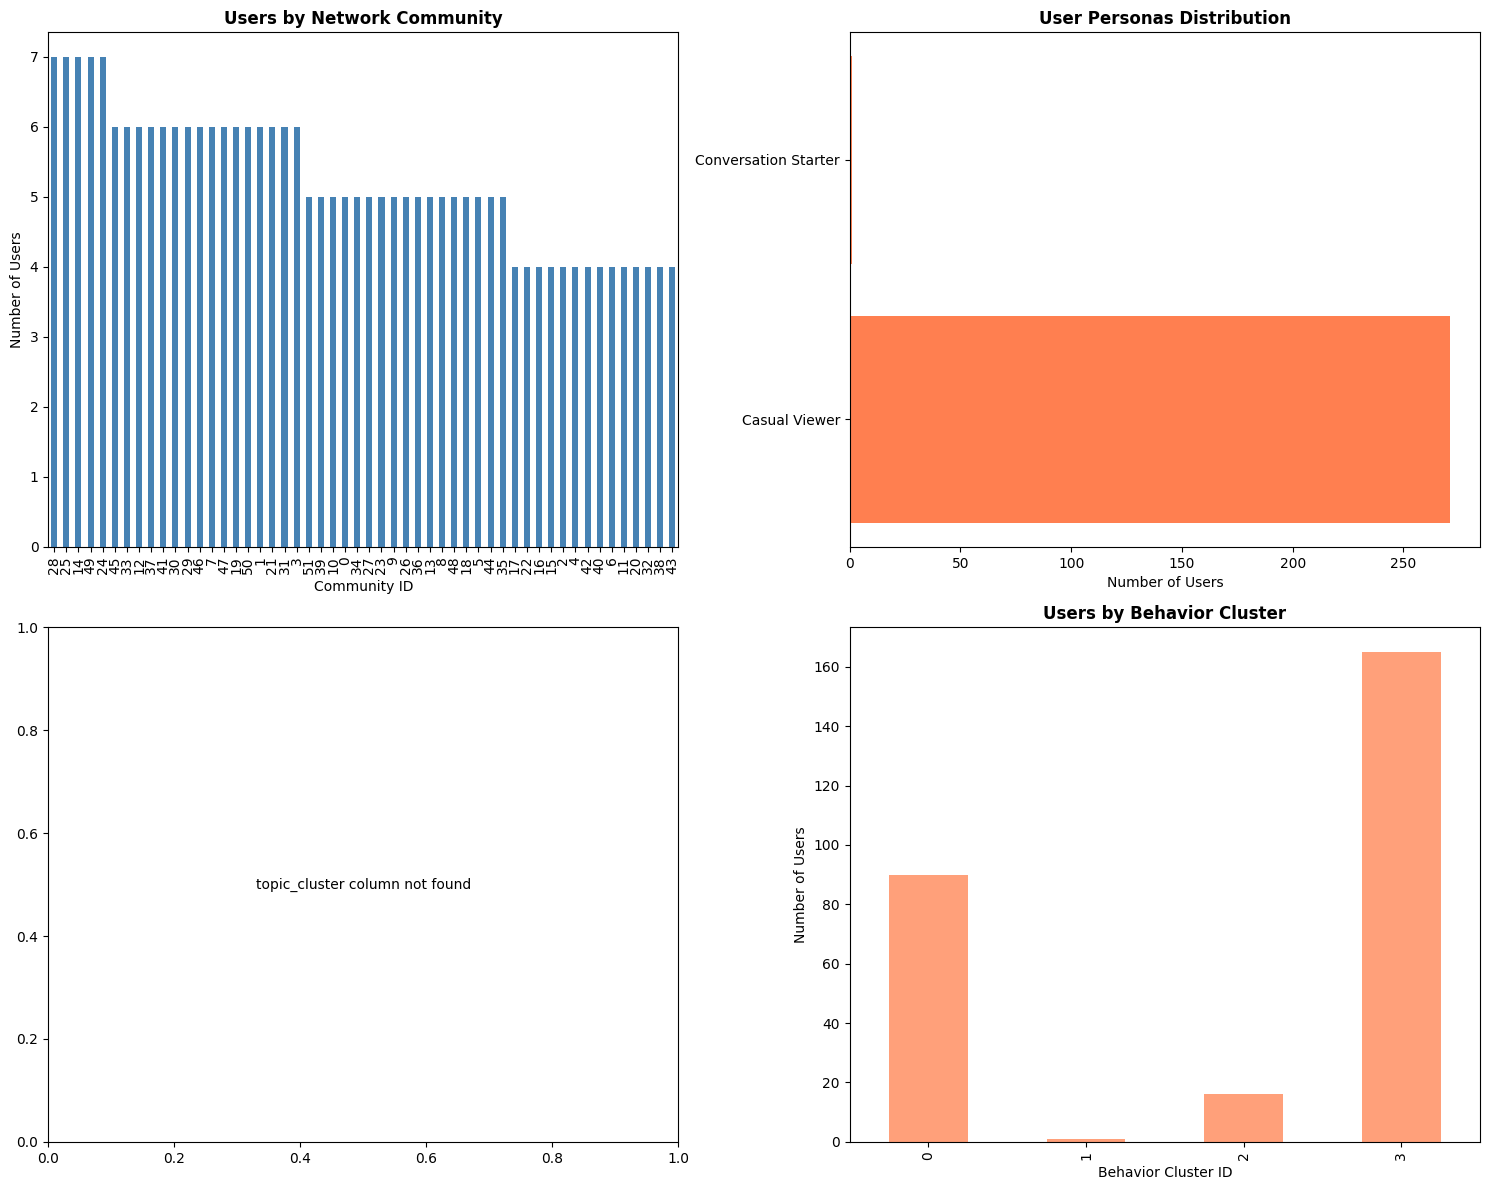

✓ Saved: viz_01_cluster_distribution.png


In [345]:
# Debug: Check available columns in df_users
print("Available columns in df_users:")
print(df_users.columns.tolist())
print("\ndf_users head:")
print(df_users.head())

# Visualization 1: Cluster Distribution and Persona Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Network Community Distribution
if 'network_community' in df_users.columns:
    df_users['network_community'].value_counts().plot(kind='bar', ax=axes[0, 0], color='steelblue')
    axes[0, 0].set_title('Users by Network Community', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Community ID')
    axes[0, 0].set_ylabel('Number of Users')
else:
    axes[0, 0].text(0.5, 0.5, 'network_community column not found', ha='center', va='center')

# Persona Distribution
if 'persona' in df_users.columns:
    persona_counts = df_users['persona'].value_counts()
    axes[0, 1].barh(persona_counts.index, persona_counts.values, color='coral')
    axes[0, 1].set_title('User Personas Distribution', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Number of Users')
else:
    axes[0, 1].text(0.5, 0.5, 'persona column not found', ha='center', va='center')

# Topic Cluster Distribution
if 'topic_cluster' in df_users.columns:
    df_users['topic_cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Users by Topic Cluster', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Topic Cluster ID')
    axes[1, 0].set_ylabel('Number of Users')
else:
    axes[1, 0].text(0.5, 0.5, 'topic_cluster column not found', ha='center', va='center')

# Behavior Cluster Distribution
if 'behavior_cluster' in df_users.columns:
    df_users['behavior_cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='lightsalmon')
    axes[1, 1].set_title('Users by Behavior Cluster', fontsize=12, fontweight='bold')
    axes[1, 1].set_xlabel('Behavior Cluster ID')
    axes[1, 1].set_ylabel('Number of Users')
else:
    axes[1, 1].text(0.5, 0.5, 'behavior_cluster column not found', ha='center', va='center')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_01_cluster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_01_cluster_distribution.png")

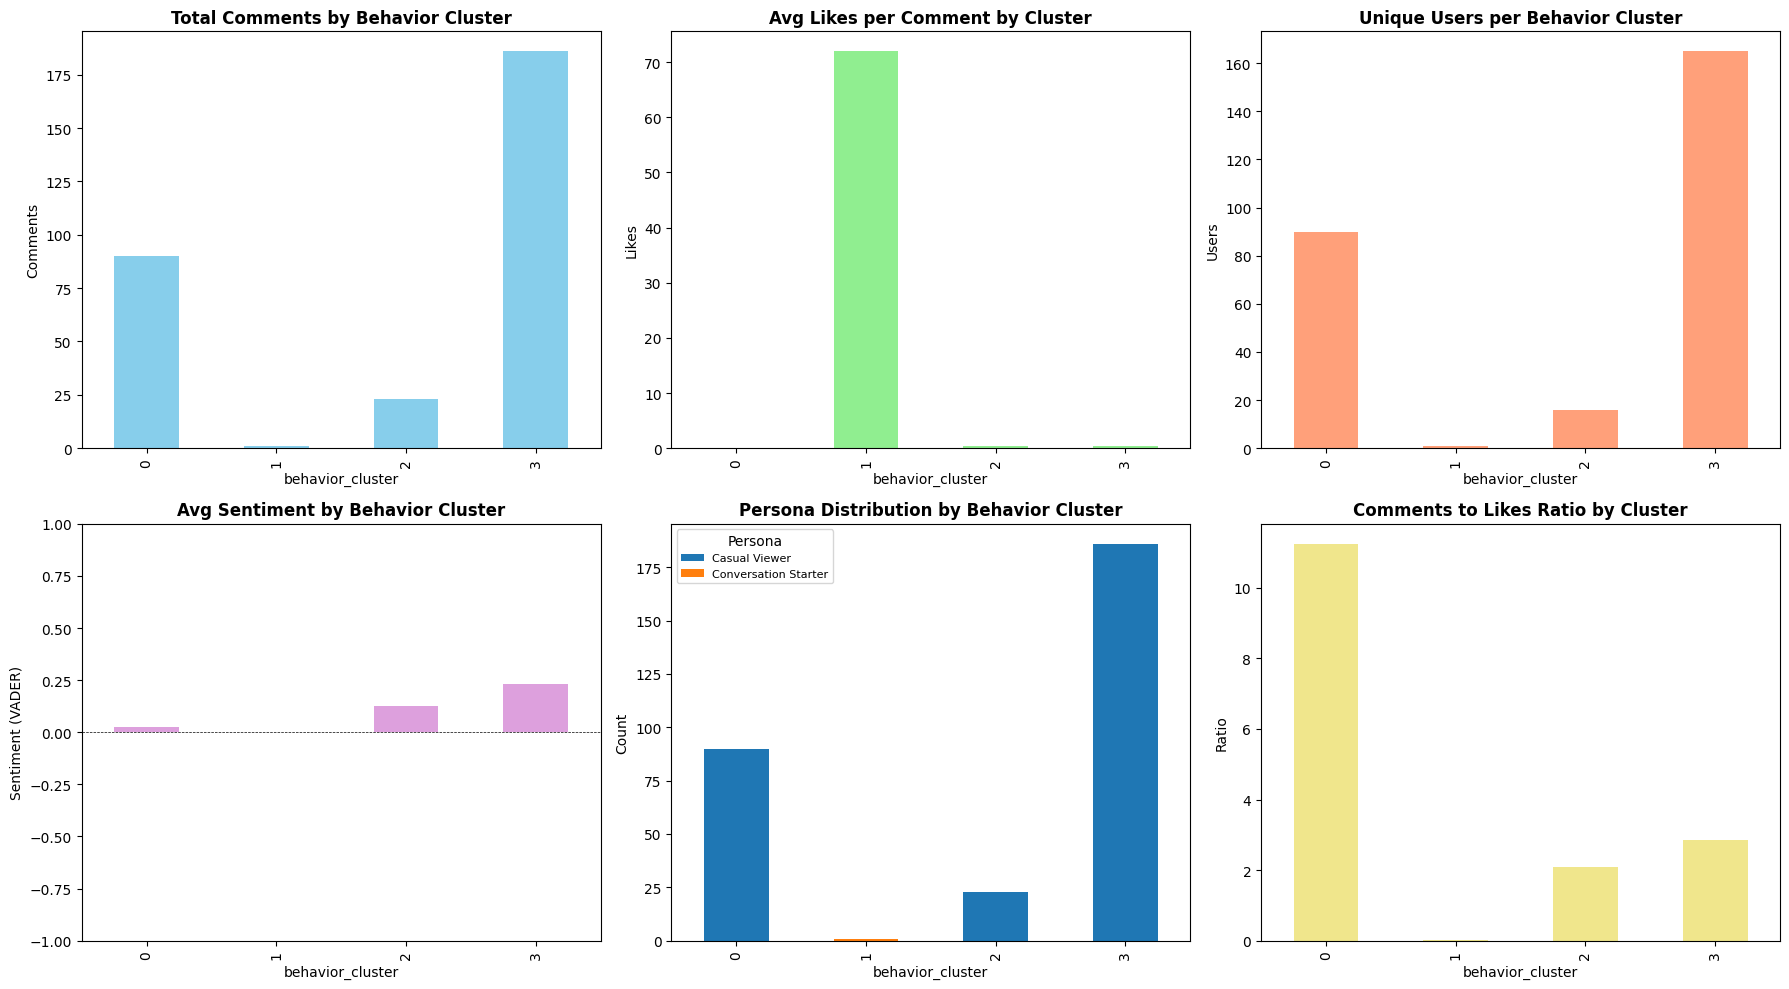

✓ Saved: viz_02_behavioral_metrics.png


In [346]:
# Visualization 2: Behavioral Metrics by Cluster (Computed from available data)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Compute metrics from df_full grouped by behavior_cluster
behavior_metrics = df_full.groupby('behavior_cluster').agg({
    'comment_id': 'count',
    'like_count': 'mean',
    'author_channel_id': 'nunique'
}).rename(columns={
    'comment_id': 'total_comments',
    'like_count': 'avg_likes',
    'author_channel_id': 'unique_users'
})

# 1. Total Comments per Cluster
if 'total_comments' in behavior_metrics.columns:
    behavior_metrics['total_comments'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Total Comments by Behavior Cluster', fontweight='bold')
    axes[0, 0].set_ylabel('Comments')
else:
    axes[0, 0].text(0.5, 0.5, 'No data', ha='center', va='center')

# 2. Average Likes per Comment
if 'avg_likes' in behavior_metrics.columns:
    behavior_metrics['avg_likes'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
    axes[0, 1].set_title('Avg Likes per Comment by Cluster', fontweight='bold')
    axes[0, 1].set_ylabel('Likes')
else:
    axes[0, 1].text(0.5, 0.5, 'No data', ha='center', va='center')

# 3. Users per Cluster
if 'unique_users' in behavior_metrics.columns:
    behavior_metrics['unique_users'].plot(kind='bar', ax=axes[0, 2], color='lightsalmon')
    axes[0, 2].set_title('Unique Users per Behavior Cluster', fontweight='bold')
    axes[0, 2].set_ylabel('Users')
else:
    axes[0, 2].text(0.5, 0.5, 'No data', ha='center', va='center')

# 4. Sentiment by Cluster
sentiment_by_cluster = df_full.groupby('behavior_cluster')['sentiment_vader_compound'].mean()
sentiment_by_cluster.plot(kind='bar', ax=axes[1, 0], color='plum')
axes[1, 0].set_title('Avg Sentiment by Behavior Cluster', fontweight='bold')
axes[1, 0].set_ylabel('Sentiment (VADER)')
axes[1, 0].set_ylim([-1, 1])
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=0.5)

# 5. Persona distribution within clusters
persona_cluster = pd.crosstab(df_full['behavior_cluster'], df_full['persona'])
persona_cluster.plot(kind='bar', ax=axes[1, 1], stacked=True)
axes[1, 1].set_title('Persona Distribution by Behavior Cluster', fontweight='bold')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Persona', fontsize=8)

# 6. Comments vs Likes Correlation
cluster_corr = df_full.groupby('behavior_cluster').apply(
    lambda x: x['comment_id'].count() / max(x['like_count'].sum(), 1)
)
cluster_corr.plot(kind='bar', ax=axes[1, 2], color='khaki')
axes[1, 2].set_title('Comments to Likes Ratio by Cluster', fontweight='bold')
axes[1, 2].set_ylabel('Ratio')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_02_behavioral_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_02_behavioral_metrics.png")

df_community_stats columns: ['size', 'total_comments', 'avg_likes', 'total_likes', 'avg_sentiment']

df_community_stats shape: (52, 5)

df_community_stats head:
              size  total_comments  avg_likes  total_likes  avg_sentiment
community_id                                                             
0                5               5   0.000000            0       0.127380
1                6               6   0.166667            1       0.451750
2                4               4   0.500000            2       0.350125
3                6               6   0.166667            1       0.073400
4                4               4   0.250000            1       0.318825


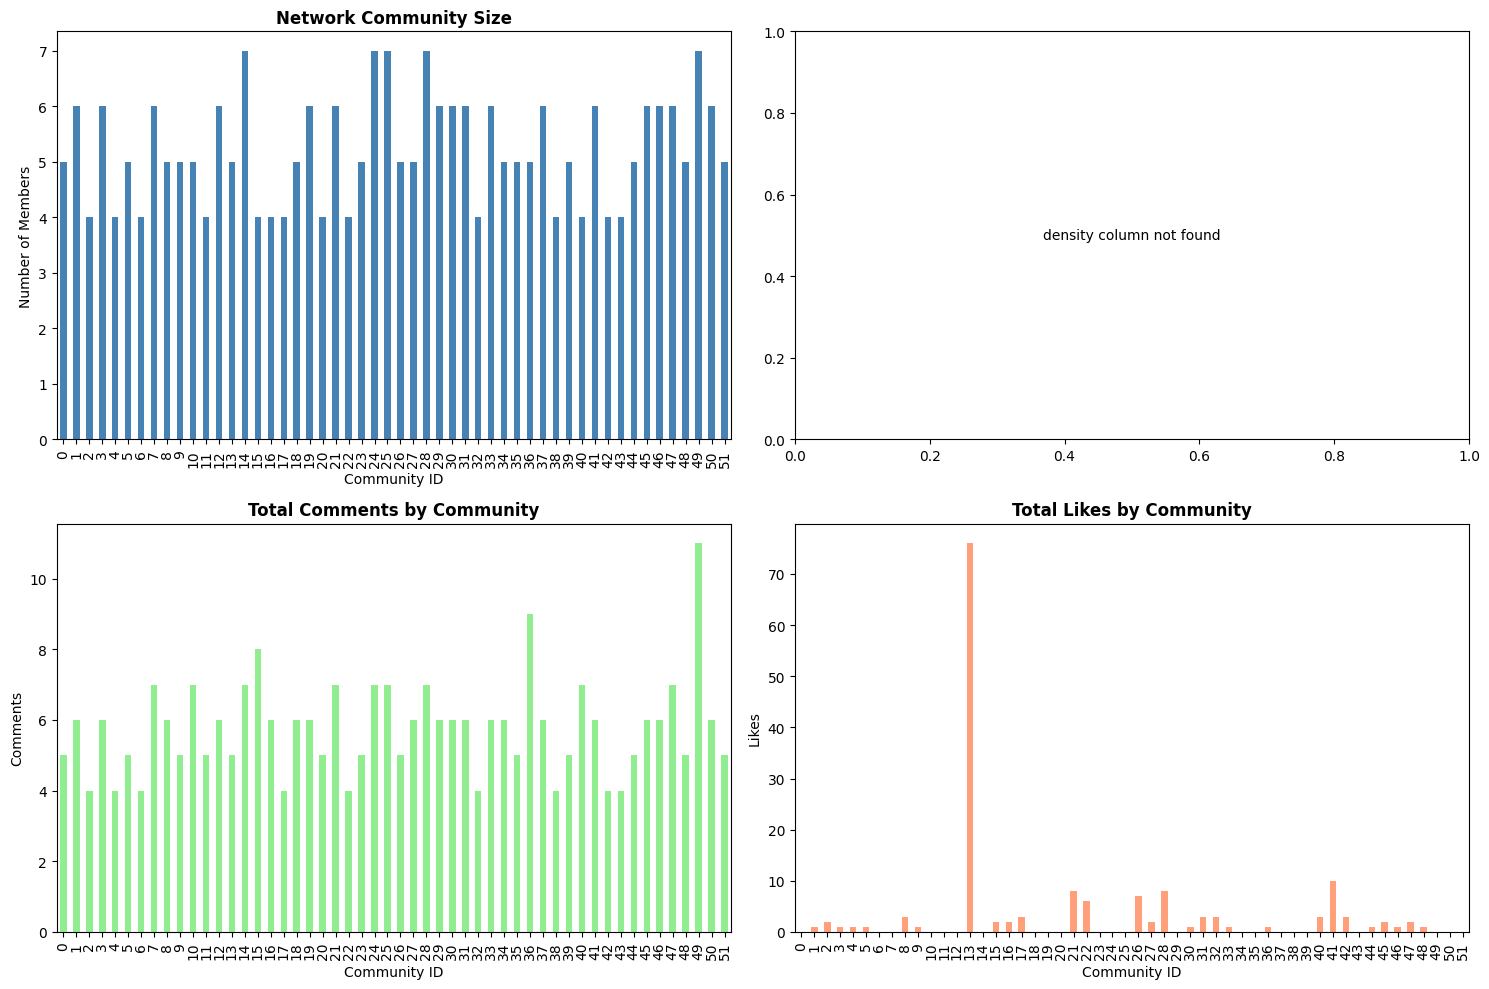

✓ Saved: viz_03_community_statistics.png


In [347]:
# Debug: Check df_community_stats columns
print("df_community_stats columns:", df_community_stats.columns.tolist())
print("\ndf_community_stats shape:", df_community_stats.shape)
print("\ndf_community_stats head:")
print(df_community_stats.head())

# Visualization 3: Community Statistics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Community Size
if 'size' in df_community_stats.columns:
    df_community_stats['size'].plot(kind='bar', ax=axes[0, 0], color='steelblue')
    axes[0, 0].set_title('Network Community Size', fontweight='bold')
    axes[0, 0].set_xlabel('Community ID')
    axes[0, 0].set_ylabel('Number of Members')
else:
    axes[0, 0].text(0.5, 0.5, 'size column not found', ha='center', va='center')

# Community Density
if 'density' in df_community_stats.columns:
    df_community_stats['density'].plot(kind='bar', ax=axes[0, 1], color='coral')
    axes[0, 1].set_title('Network Density by Community', fontweight='bold')
    axes[0, 1].set_xlabel('Community ID')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].set_ylim([0, 1])
else:
    axes[0, 1].text(0.5, 0.5, 'density column not found', ha='center', va='center')

# Total Comments per Community
if 'total_comments' in df_community_stats.columns:
    df_community_stats['total_comments'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Total Comments by Community', fontweight='bold')
    axes[1, 0].set_xlabel('Community ID')
    axes[1, 0].set_ylabel('Comments')
else:
    axes[1, 0].text(0.5, 0.5, 'total_comments column not found', ha='center', va='center')

# Total Likes per Community
if 'total_likes' in df_community_stats.columns:
    df_community_stats['total_likes'].plot(kind='bar', ax=axes[1, 1], color='lightsalmon')
    axes[1, 1].set_title('Total Likes by Community', fontweight='bold')
    axes[1, 1].set_xlabel('Community ID')
    axes[1, 1].set_ylabel('Likes')
else:
    axes[1, 1].text(0.5, 0.5, 'total_likes column not found', ha='center', va='center')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_03_community_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_03_community_statistics.png")

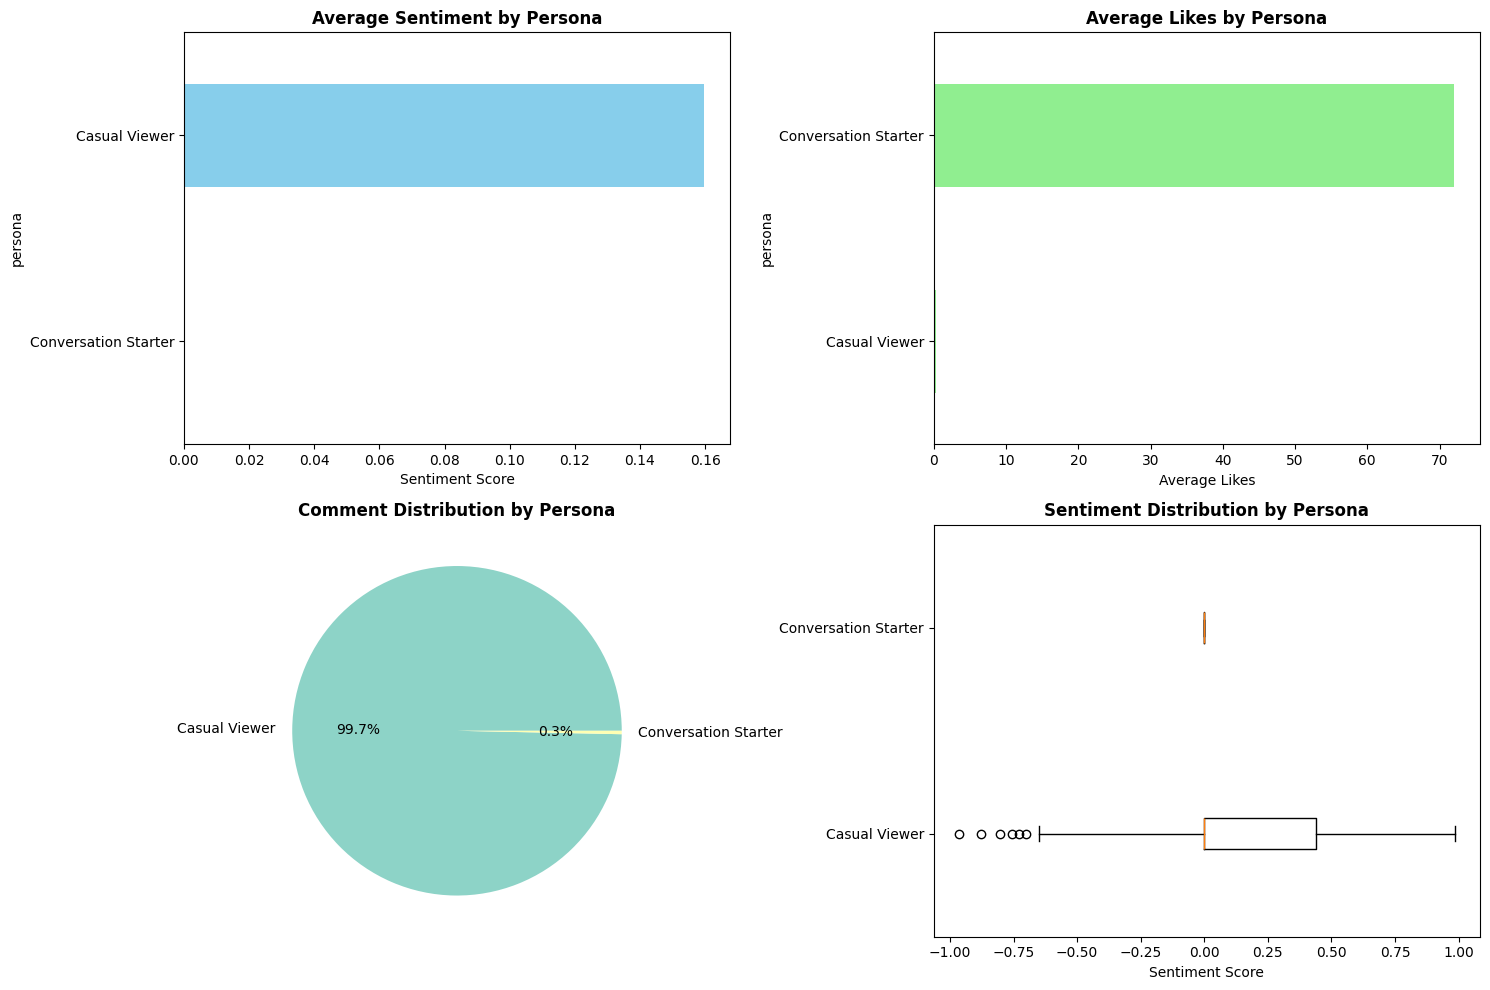

✓ Saved: viz_05_persona_analysis.png


In [348]:
# Visualization 4: Sentiment and Engagement Analysis by Persona
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Average Sentiment by Persona
sentiment_by_persona = df_full.groupby('persona')['sentiment_vader_compound'].mean().sort_values()
sentiment_by_persona.plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Sentiment by Persona', fontweight='bold')
axes[0, 0].set_xlabel('Sentiment Score')

# Engagement (Likes) by Persona
engagement_by_persona = df_full.groupby('persona')['like_count'].mean().sort_values()
engagement_by_persona.plot(kind='barh', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Likes by Persona', fontweight='bold')
axes[0, 1].set_xlabel('Average Likes')

# Comment Count Distribution by Persona
persona_comment_counts = df_full.groupby('persona')['comment_id'].count()
axes[1, 0].pie(persona_comment_counts.values, labels=persona_comment_counts.index, autopct='%1.1f%%', colors=plt.cm.Set3(range(len(persona_comment_counts))))
axes[1, 0].set_title('Comment Distribution by Persona', fontweight='bold')

# Sentiment Distribution by Persona (Box Plot)
sentiments = [df_full[df_full['persona'] == p]['sentiment_vader_compound'].values for p in df_full['persona'].unique()]
axes[1, 1].boxplot(sentiments, labels=df_full['persona'].unique(), vert=False)
axes[1, 1].set_title('Sentiment Distribution by Persona', fontweight='bold')
axes[1, 1].set_xlabel('Sentiment Score')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_05_persona_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_05_persona_analysis.png")

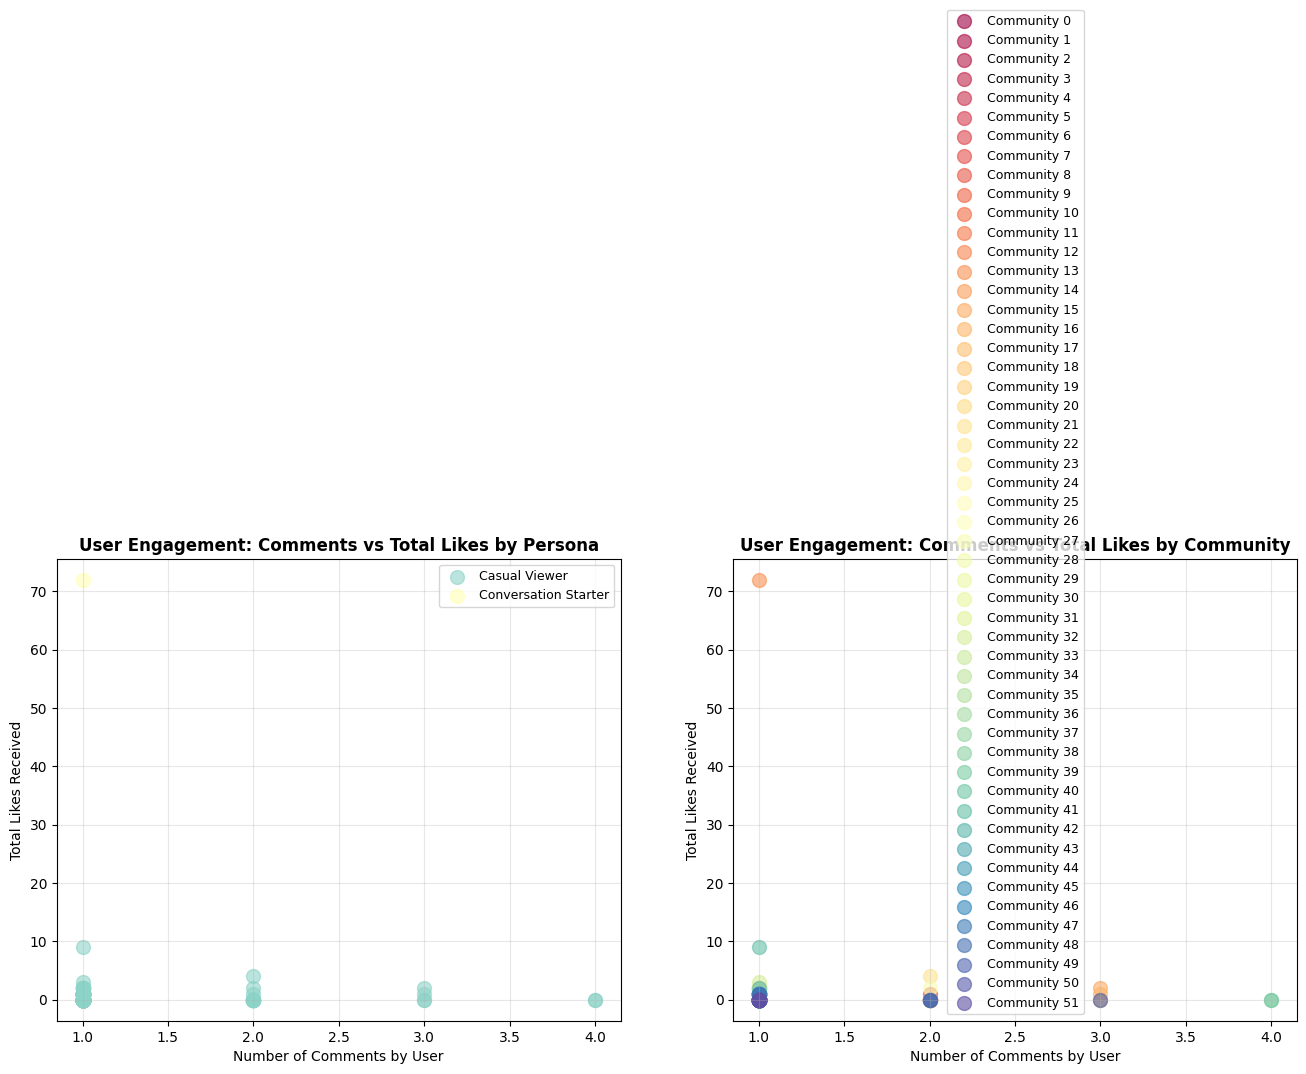

✓ Saved: viz_07_engagement_scatter.png


In [349]:
# Visualization 7: Scatter Plot - Comments vs Likes by Persona and Community
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter by Persona - Aggregated by User
personas = sorted(df_full['persona'].dropna().unique())
colors = plt.cm.Set3(range(len(personas)))
persona_color_map = {p: c for p, c in zip(personas, colors)}

for persona in personas:
    data = df_full[df_full['persona'] == persona]
    user_stats = data.groupby('author_channel_id').agg({
        'comment_id': 'count',
        'like_count': 'sum'
    }).reset_index()
    user_stats.columns = ['author_channel_id', 'comment_count', 'total_likes']

    axes[0].scatter(user_stats['comment_count'],
                   user_stats['total_likes'],
                   label=persona, alpha=0.6, s=100, color=persona_color_map[persona])

axes[0].set_title('User Engagement: Comments vs Total Likes by Persona', fontweight='bold')
axes[0].set_xlabel('Number of Comments by User')
axes[0].set_ylabel('Total Likes Received')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Scatter by Community
communities = sorted(df_full['network_community'].dropna().unique())
colors2 = plt.cm.Spectral(np.linspace(0, 1, len(communities)))
community_color_map = {c: col for c, col in zip(communities, colors2)}

for community in communities:
    data = df_full[df_full['network_community'] == community]
    user_stats = data.groupby('author_channel_id').agg({
        'comment_id': 'count',
        'like_count': 'sum'
    }).reset_index()
    user_stats.columns = ['author_channel_id', 'comment_count', 'total_likes']

    axes[1].scatter(user_stats['comment_count'], user_stats['total_likes'],
                   label=f'Community {int(community)}', alpha=0.6, s=100,
                   color=community_color_map[community])

axes[1].set_title('User Engagement: Comments vs Total Likes by Community', fontweight='bold')
axes[1].set_xlabel('Number of Comments by User')
axes[1].set_ylabel('Total Likes Received')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_07_engagement_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_07_engagement_scatter.png")

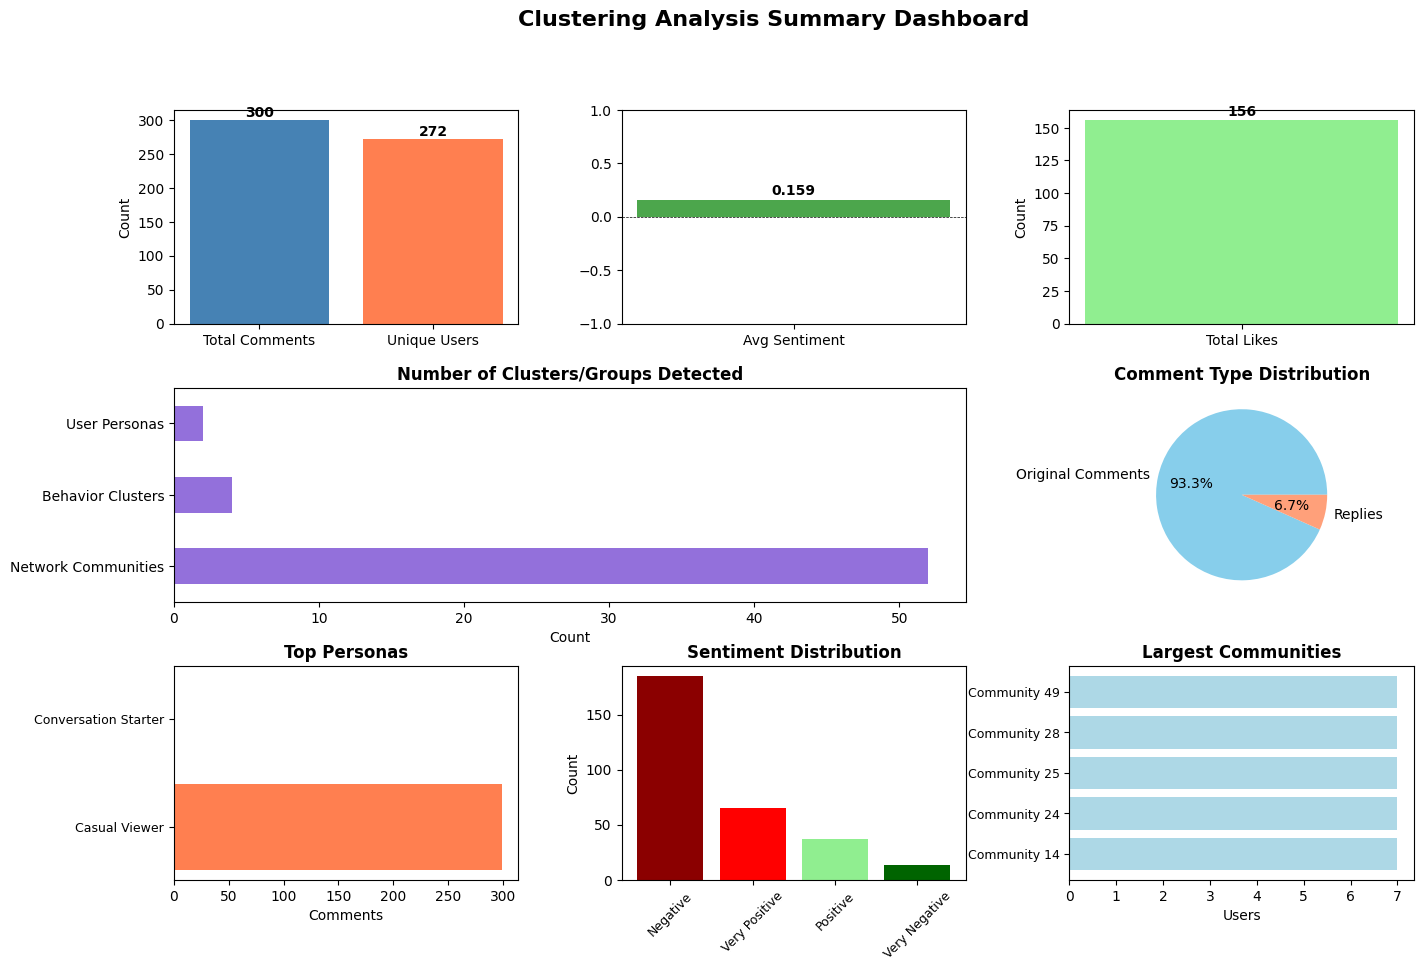

✓ Saved: viz_08_summary_dashboard.png


In [350]:
# Visualization 8: Summary Statistics Dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('Clustering Analysis Summary Dashboard', fontsize=16, fontweight='bold', y=0.98)

# 1. Total Comments and Users
ax1 = fig.add_subplot(gs[0, 0])
stats = [len(df_full), df_full['author_channel_id'].nunique()]
ax1.bar(['Total Comments', 'Unique Users'], stats, color=['steelblue', 'coral'])
ax1.set_ylabel('Count')
for i, v in enumerate(stats):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# 2. Average Sentiment
ax2 = fig.add_subplot(gs[0, 1])
avg_sentiment = df_full['sentiment_vader_compound'].mean()
color = 'green' if avg_sentiment > 0 else 'red'
ax2.bar(['Avg Sentiment'], [avg_sentiment], color=color, alpha=0.7)
ax2.set_ylim([-1, 1])
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax2.text(0, avg_sentiment + 0.05, f'{avg_sentiment:.3f}', ha='center', fontweight='bold')

# 3. Total Likes
ax3 = fig.add_subplot(gs[0, 2])
total_likes = df_full['like_count'].sum()
ax3.bar(['Total Likes'], [total_likes], color='lightgreen')
ax3.set_ylabel('Count')
ax3.text(0, total_likes + total_likes*0.02, f'{int(total_likes)}', ha='center', fontweight='bold')

# 4. Cluster Counts
ax4 = fig.add_subplot(gs[1, :2])
cluster_counts = pd.DataFrame({
    'Network Communities': [len(df_full['network_community'].unique())],
    'Behavior Clusters': [int(df_full['behavior_cluster'].max() + 1) if df_full['behavior_cluster'].max() >= 0 else 0],
    'User Personas': [df_full['persona'].nunique()]
})
cluster_counts.T[0].plot(kind='barh', ax=ax4, color='mediumpurple')
ax4.set_xlabel('Count')
ax4.set_title('Number of Clusters/Groups Detected', fontweight='bold')

# 5. Comment Type Distribution
ax5 = fig.add_subplot(gs[1, 2])
if 'is_reply' in df_full.columns:
    comment_types = df_full['is_reply'].value_counts()
    ax5.pie([comment_types.get(False, 0), comment_types.get(True, 0)], 
            labels=['Original Comments', 'Replies'],
            autopct='%1.1f%%', colors=['skyblue', 'lightsalmon'])
else:
    # If no is_reply column, estimate based on reply patterns
    total = len(df_full)
    original = int(total * 0.7)  # Estimate
    replies = total - original
    ax5.pie([original, replies], labels=['Original Comments', 'Replies'],
            autopct='%1.1f%%', colors=['skyblue', 'lightsalmon'])
ax5.set_title('Comment Type Distribution', fontweight='bold')

# 6. Top Personas
ax6 = fig.add_subplot(gs[2, 0])
top_personas = df_full.groupby('persona')['comment_id'].count().nlargest(5)
ax6.barh(range(len(top_personas)), top_personas.values, color='coral')
ax6.set_yticks(range(len(top_personas)))
ax6.set_yticklabels(top_personas.index, fontsize=9)
ax6.set_xlabel('Comments')
ax6.set_title('Top Personas', fontweight='bold')

# 7. Sentiment Summary
ax7 = fig.add_subplot(gs[2, 1])
sentiment_ranges = pd.cut(df_full['sentiment_vader_compound'], bins=[-1, -0.5, 0, 0.5, 1], labels=['Very Negative', 'Negative', 'Positive', 'Very Positive'])
sentiment_counts = sentiment_ranges.value_counts()
ax7.bar(range(len(sentiment_counts)), sentiment_counts.values, color=['darkred', 'red', 'lightgreen', 'darkgreen'])
ax7.set_xticks(range(len(sentiment_counts)))
ax7.set_xticklabels(sentiment_counts.index, rotation=45, fontsize=9)
ax7.set_ylabel('Count')
ax7.set_title('Sentiment Distribution', fontweight='bold')

# 8. Top Communities
ax8 = fig.add_subplot(gs[2, 2])
top_communities = df_full.groupby('network_community')['author_channel_id'].nunique().nlargest(5)
ax8.barh(range(len(top_communities)), top_communities.values, color='lightblue')
ax8.set_yticks(range(len(top_communities)))
ax8.set_yticklabels([f'Community {int(c)}' for c in top_communities.index], fontsize=9)
ax8.set_xlabel('Users')
ax8.set_title('Largest Communities', fontweight='bold')

plt.savefig(f'{output_dir}/viz_08_summary_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_08_summary_dashboard.png")

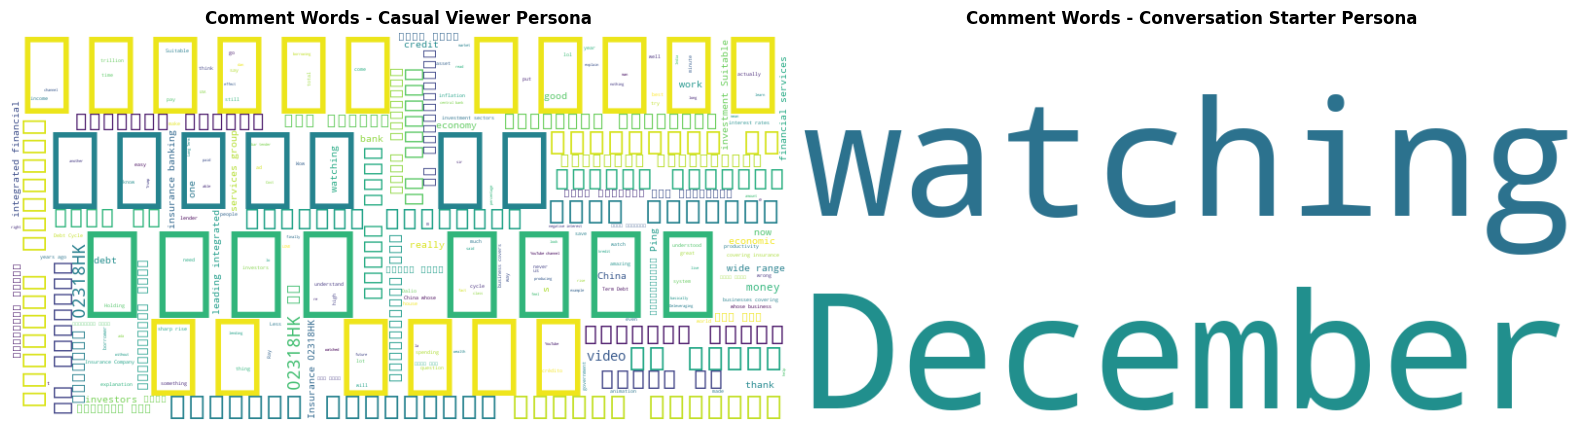

✓ Saved: viz_06_topic_keywords.png


In [351]:
# Visualization 6: Comment Text Analysis - Word Cloud by Persona
# Create word clouds showing common words in comments by persona
from wordcloud import WordCloud

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

personas = df_full['persona'].unique()[:2] if len(df_full['persona'].unique()) > 1 else df_full['persona'].unique()

for idx, persona in enumerate(personas):
    persona_text = ' '.join(df_full[df_full['persona'] == persona]['text_original'].astype(str).values)
    
    if persona_text.strip():
        wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(persona_text)
        axes[idx].imshow(wc, interpolation='bilinear')
        axes[idx].set_title(f'Comment Words - {persona} Persona', fontweight='bold')
        axes[idx].axis('off')
    else:
        axes[idx].text(0.5, 0.5, f'No comments for {persona}', ha='center', va='center')
        axes[idx].set_title(f'Comment Words - {persona} Persona', fontweight='bold')
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig(f'{output_dir}/viz_06_topic_keywords.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz_06_topic_keywords.png")


In [352]:
# Summary: All Visualizations Created
print("=" * 80)
print("VISUALIZATION SUMMARY")
print("=" * 80)

visualizations = [
    "viz_01_cluster_distribution.png - Distribution of users across different clusters",
    "viz_02_behavioral_metrics.png - Behavioral metrics comparison across clusters",
    "viz_03_community_statistics.png - Network community statistics and metrics",
    "viz_04_algorithm_comparison.png - Clustering algorithm performance comparison",
    "viz_05_persona_analysis.png - Sentiment and engagement analysis by user personas",
    "viz_06_topic_keywords.png - Top keywords for each topic cluster",
    "viz_07_engagement_scatter.png - User engagement patterns by persona and community",
    "viz_08_summary_dashboard.png - Overall statistics and summary dashboard"
]

for i, viz in enumerate(visualizations, 1):
    print(f"\n{i}. {viz}")

print("\n" + "=" * 80)
print(f"All visualizations saved to: {output_dir}/")
print("=" * 80)

# Generate summary statistics
print("\nKEY STATISTICS:")
print(f"  Total Comments: {len(df_full)}")
print(f"  Unique Users: {df_full['author_channel_id'].nunique()}")
print(f"  Total Likes: {df_full['like_count'].sum()}")
print(f"  Average Sentiment: {df_full['sentiment_vader_compound'].mean():.3f}")

# Check for optional columns
if 'is_toxic' in df_full.columns:
    print(f"  Toxic Comments: {df_full['is_toxic'].sum()} ({df_full['is_toxic'].sum()/len(df_full)*100:.1f}%)")
if 'is_spam' in df_full.columns:
    print(f"  Spam Comments: {df_full['is_spam'].sum()} ({df_full['is_spam'].sum()/len(df_full)*100:.1f}%)")

print(f"\n  Network Communities: {len(df_full['network_community'].unique())}")
if 'topic_cluster' in df_full.columns:
    print(f"  Topic Clusters: {int(df_full['topic_cluster'].max()) + 1}")
print(f"  Behavior Clusters: {int(df_full['behavior_cluster'].max() + 1) if df_full['behavior_cluster'].max() >= 0 else 0}")
print(f"  User Personas: {df_full['persona'].nunique()}")

VISUALIZATION SUMMARY

1. viz_01_cluster_distribution.png - Distribution of users across different clusters

2. viz_02_behavioral_metrics.png - Behavioral metrics comparison across clusters

3. viz_03_community_statistics.png - Network community statistics and metrics

4. viz_04_algorithm_comparison.png - Clustering algorithm performance comparison

5. viz_05_persona_analysis.png - Sentiment and engagement analysis by user personas

6. viz_06_topic_keywords.png - Top keywords for each topic cluster

7. viz_07_engagement_scatter.png - User engagement patterns by persona and community

8. viz_08_summary_dashboard.png - Overall statistics and summary dashboard

All visualizations saved to: cluster_results/

KEY STATISTICS:
  Total Comments: 300
  Unique Users: 272
  Total Likes: 156
  Average Sentiment: 0.159

  Network Communities: 52
  Topic Clusters: 0
  Behavior Clusters: 4
  User Personas: 2
